In [11]:
import os
import pandas as pd
import glob
import missingno as msno
import matplotlib.pyplot as plt

<Figure size 1200x500 with 0 Axes>

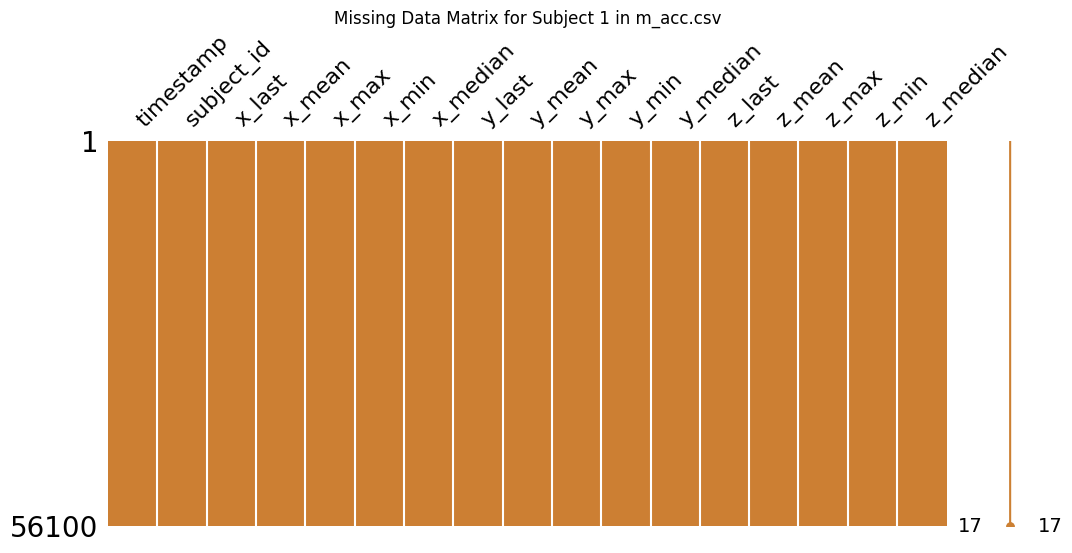

<Figure size 1200x500 with 0 Axes>

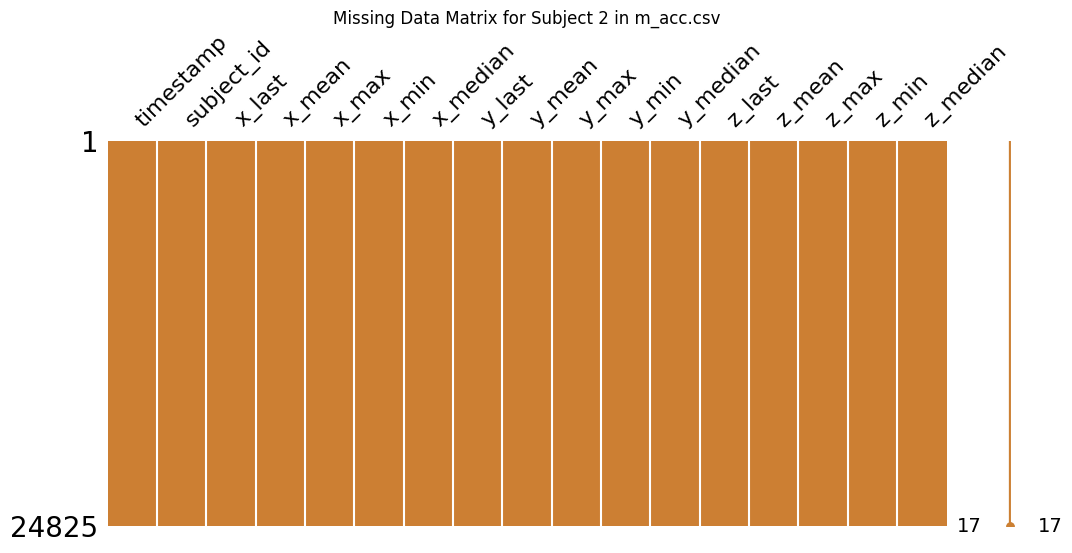

<Figure size 1200x500 with 0 Axes>

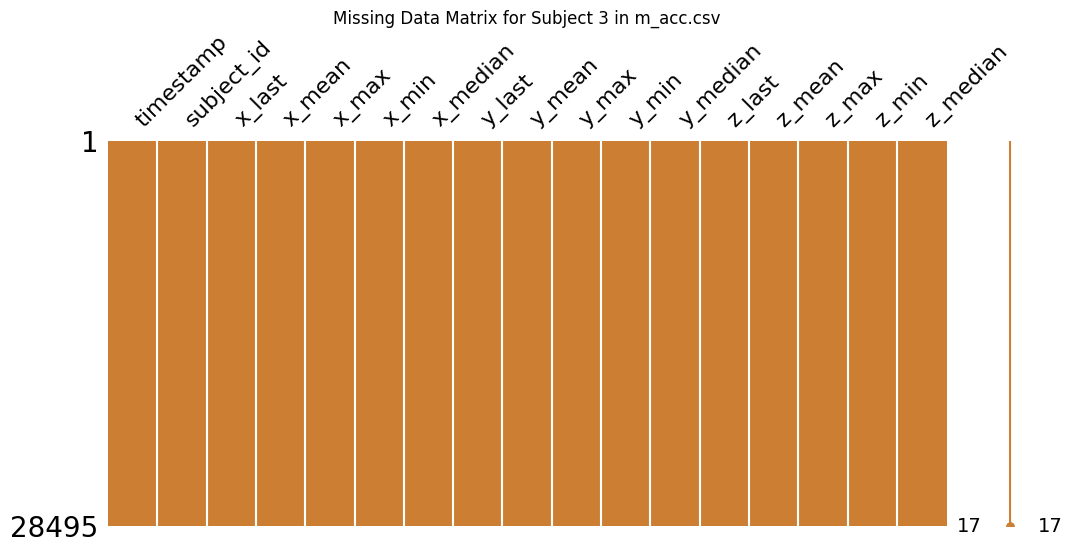

<Figure size 1200x500 with 0 Axes>

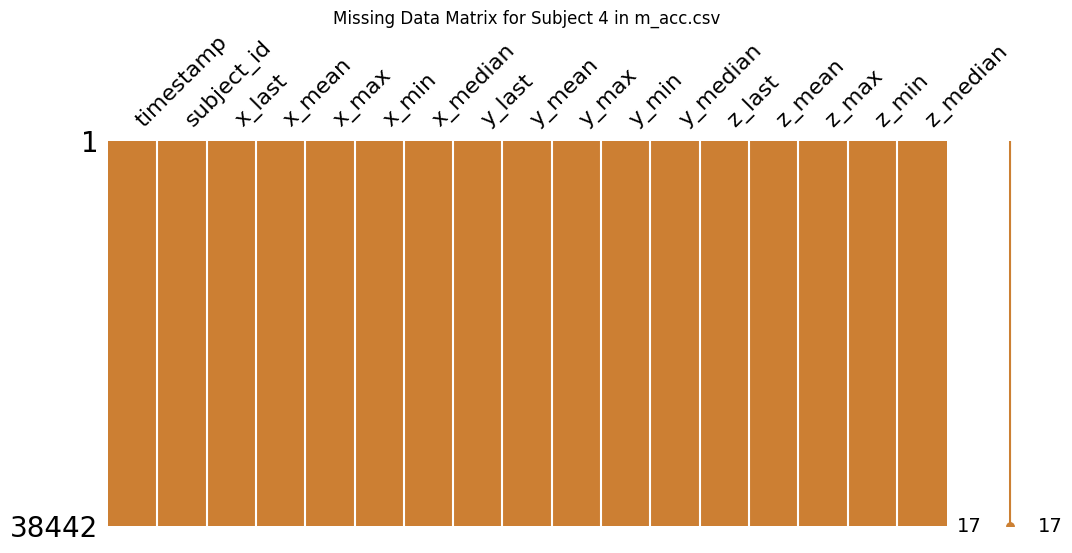

<Figure size 1200x500 with 0 Axes>

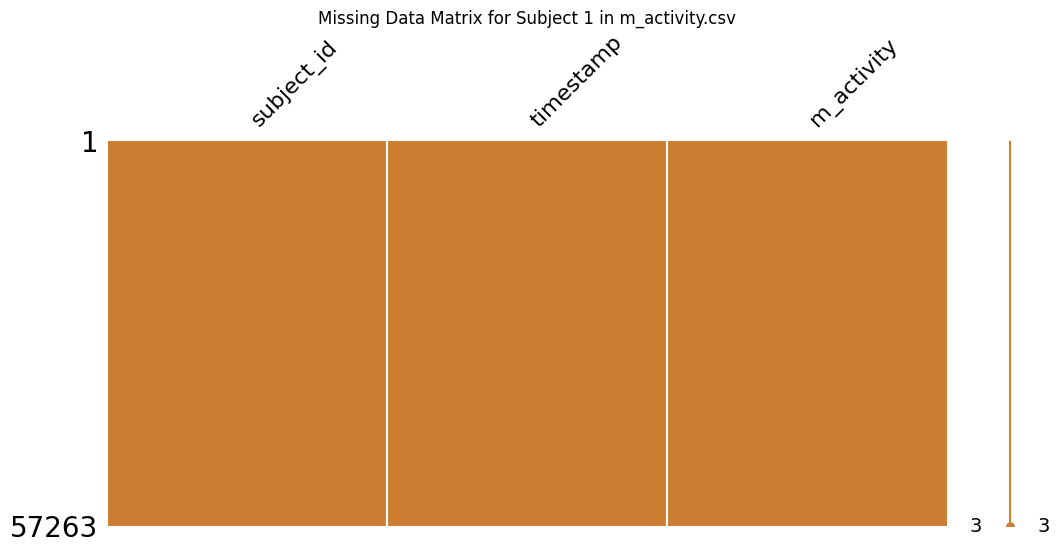

<Figure size 1200x500 with 0 Axes>

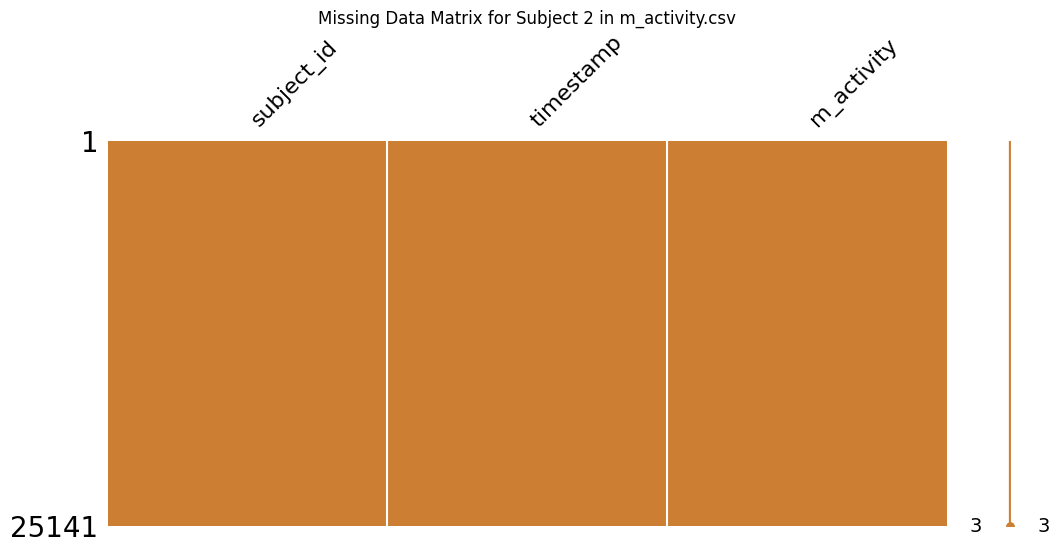

<Figure size 1200x500 with 0 Axes>

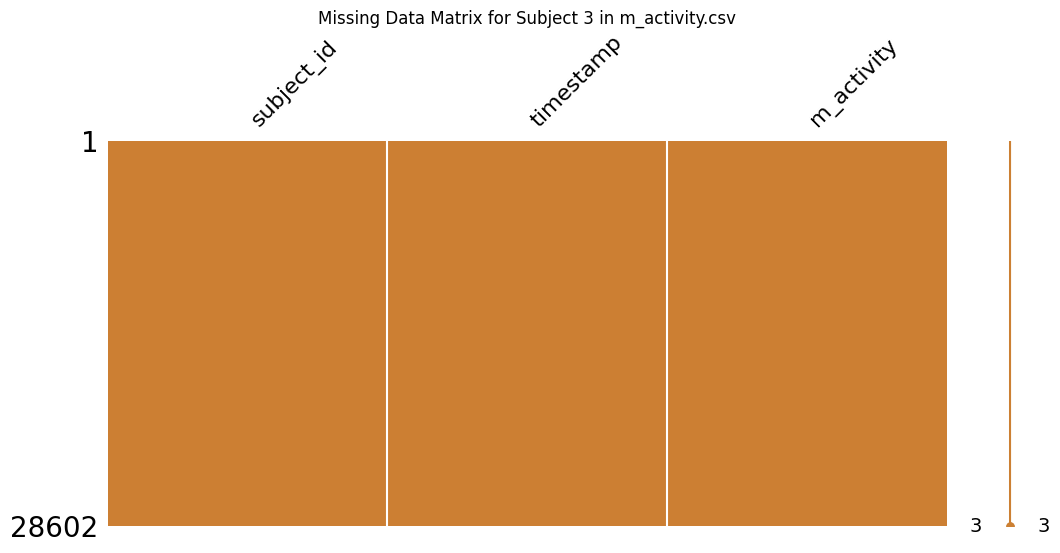

<Figure size 1200x500 with 0 Axes>

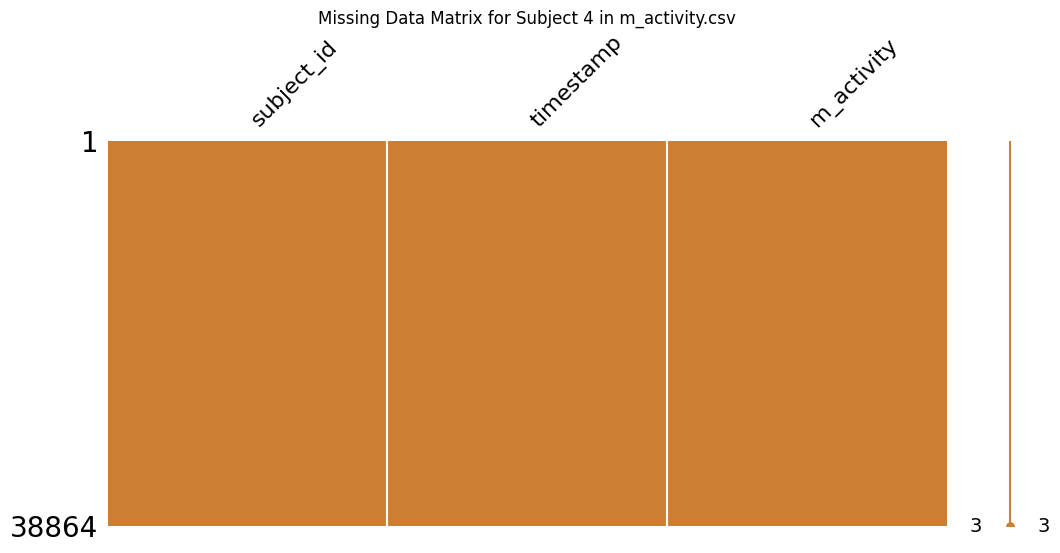

<Figure size 1200x500 with 0 Axes>

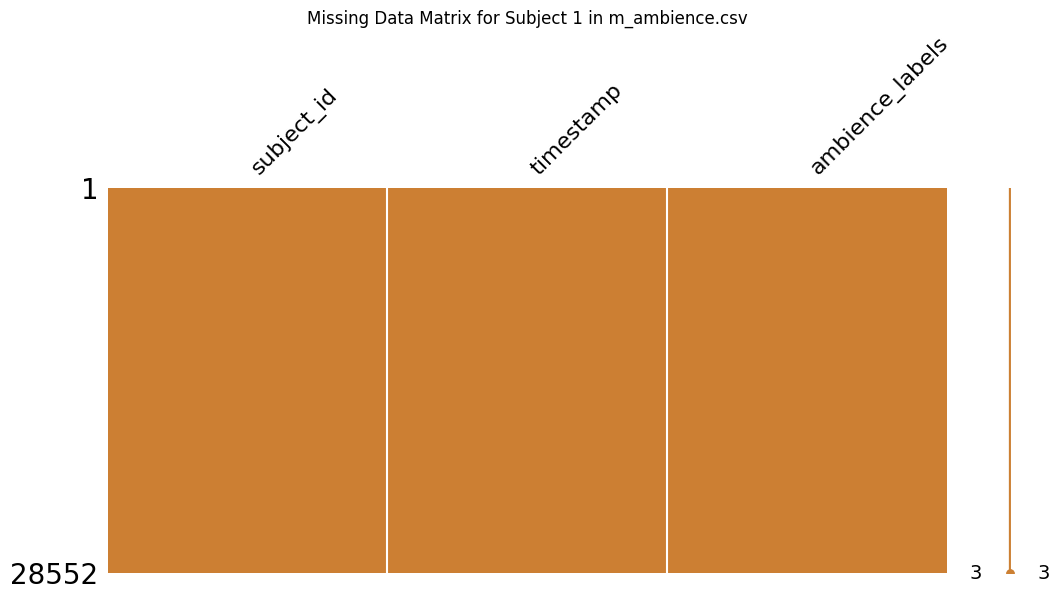

<Figure size 1200x500 with 0 Axes>

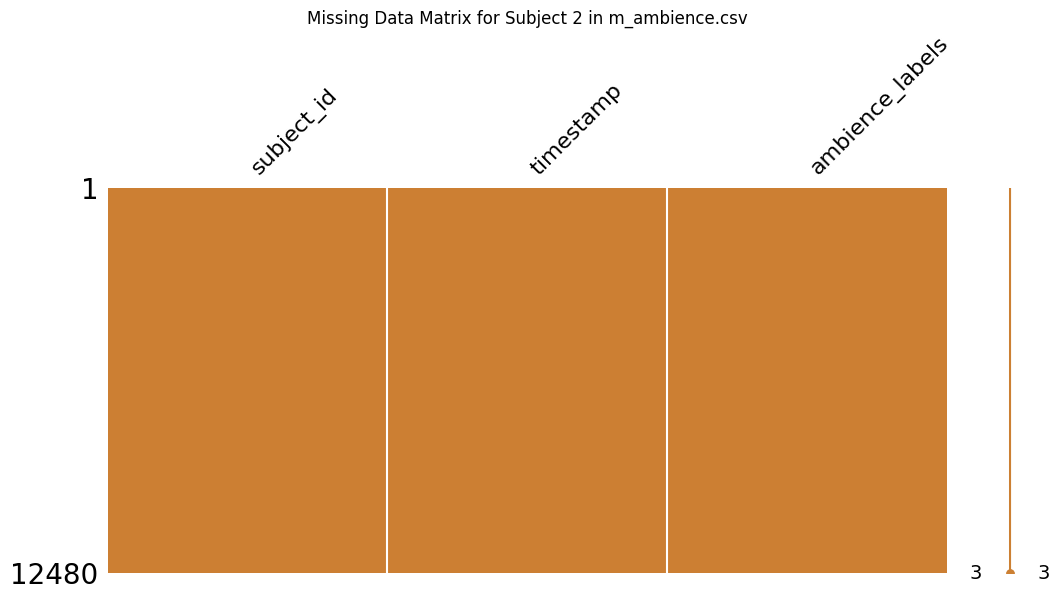

<Figure size 1200x500 with 0 Axes>

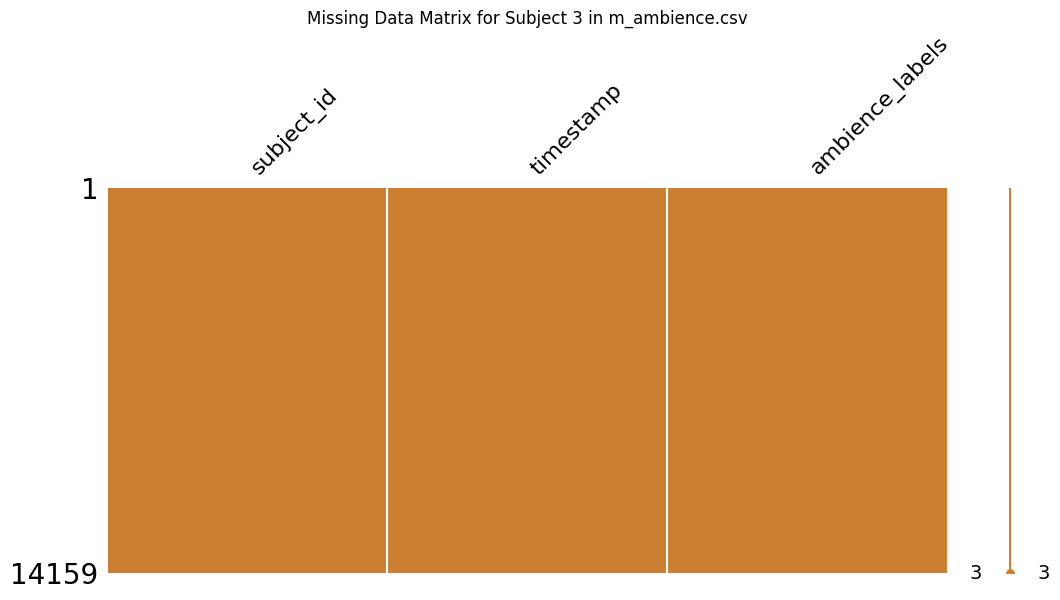

<Figure size 1200x500 with 0 Axes>

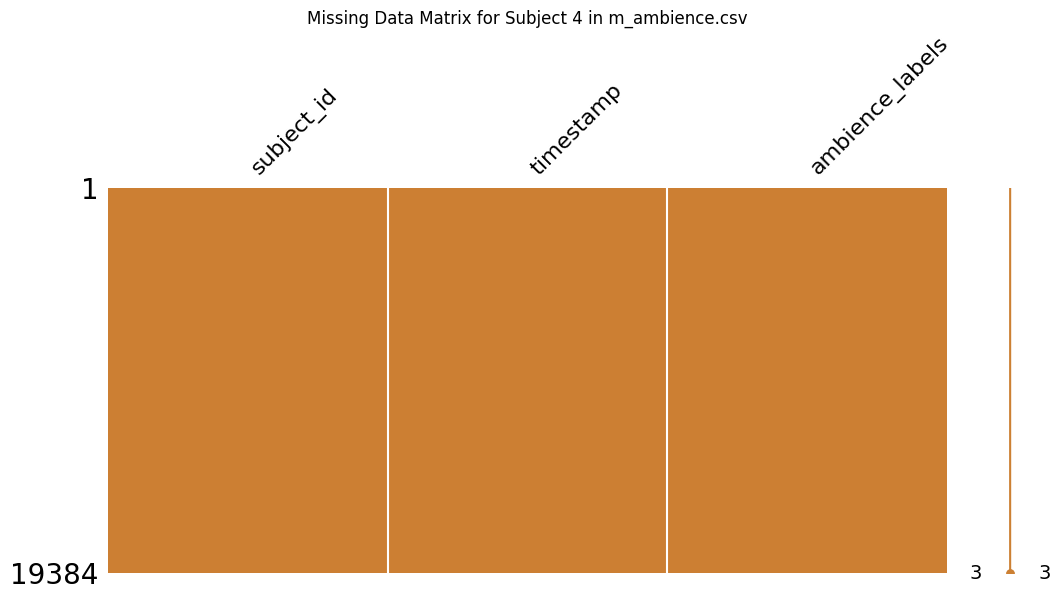

<Figure size 1200x500 with 0 Axes>

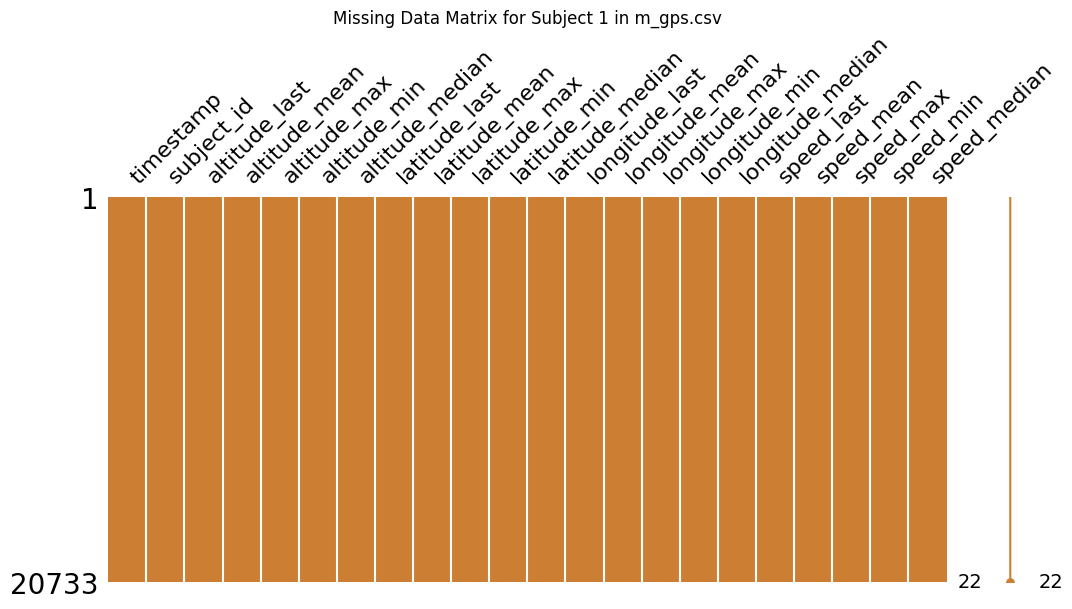

<Figure size 1200x500 with 0 Axes>

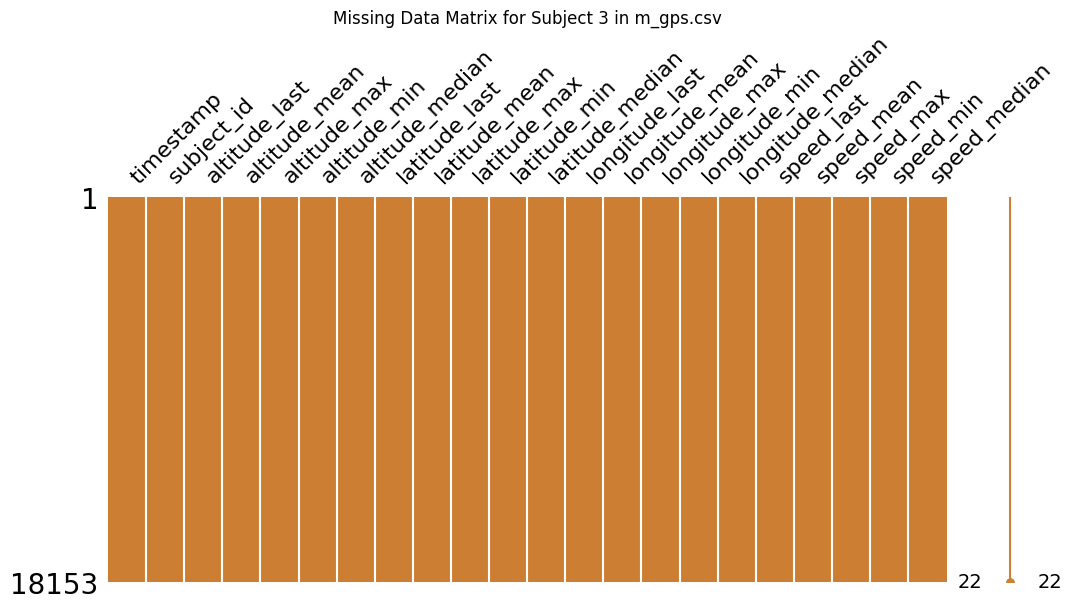

<Figure size 1200x500 with 0 Axes>

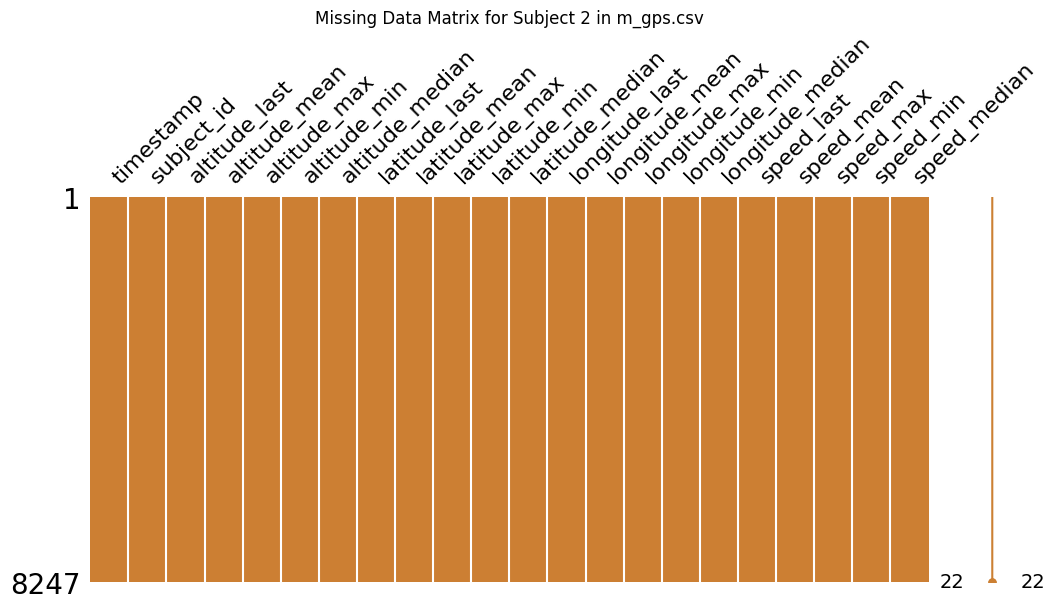

<Figure size 1200x500 with 0 Axes>

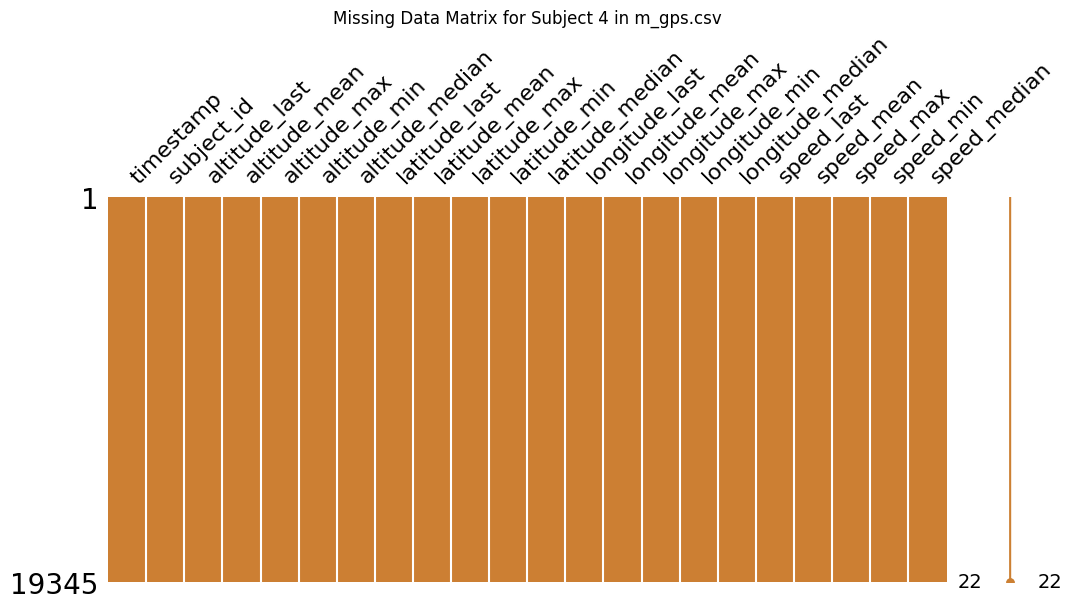

<Figure size 1200x500 with 0 Axes>

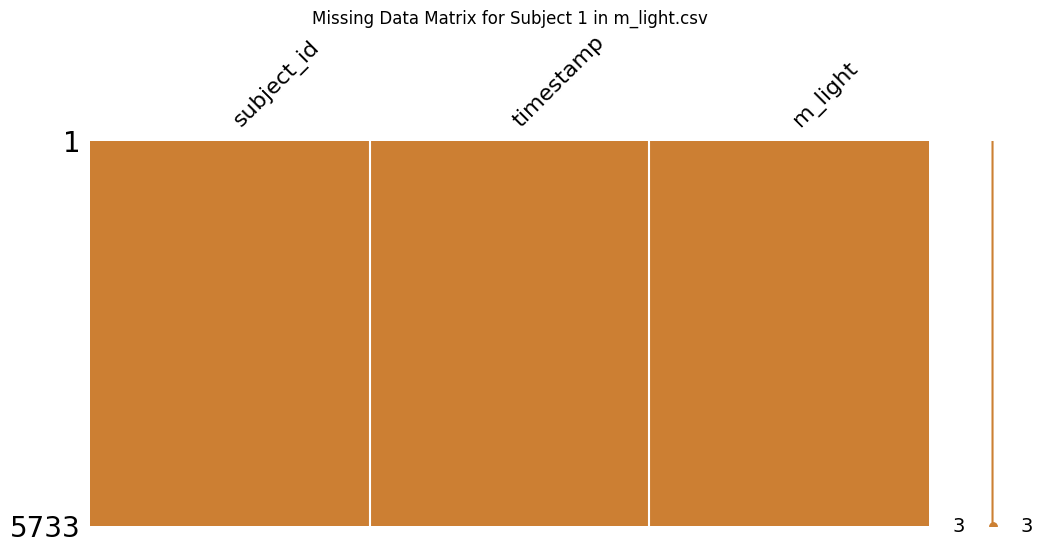

<Figure size 1200x500 with 0 Axes>

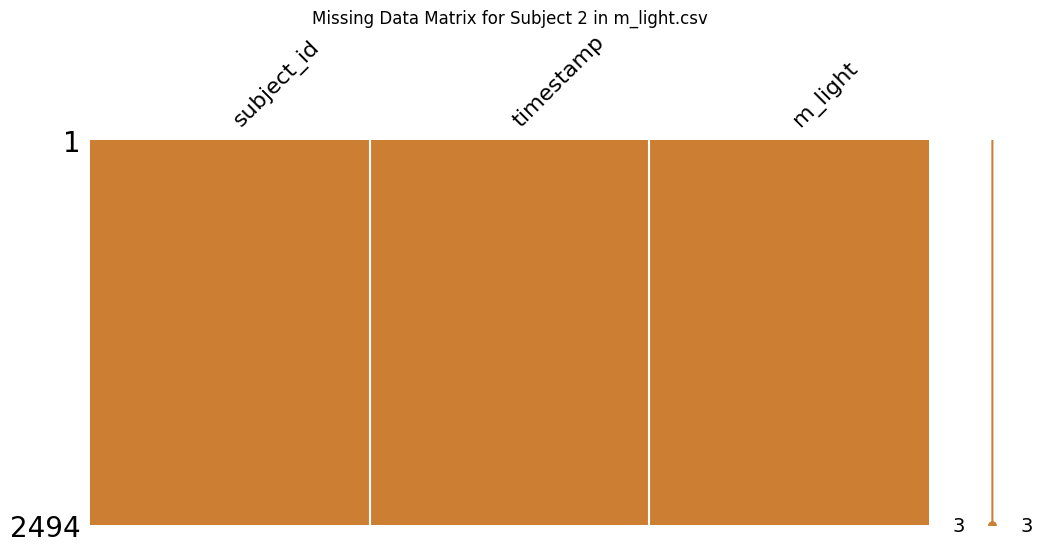

<Figure size 1200x500 with 0 Axes>

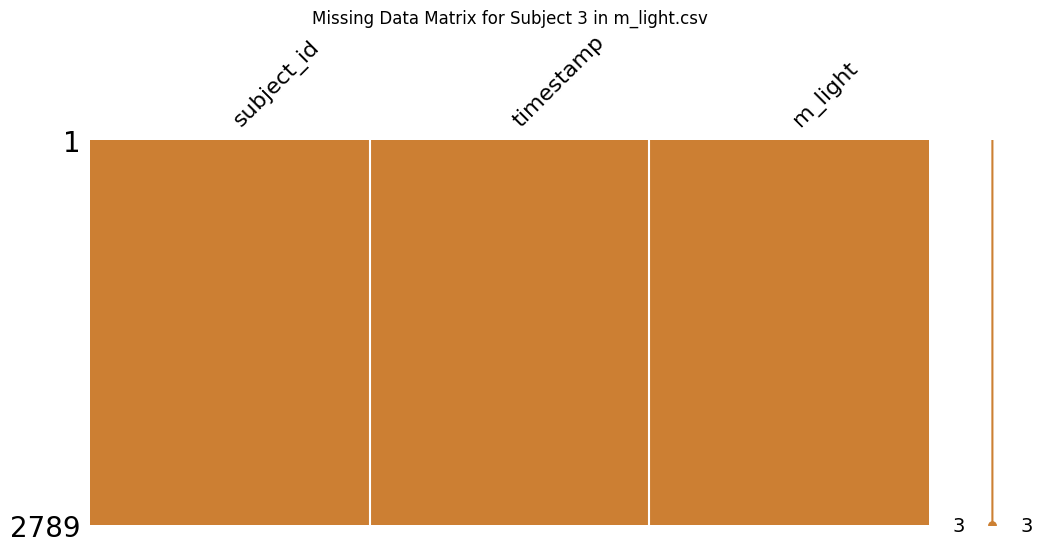

<Figure size 1200x500 with 0 Axes>

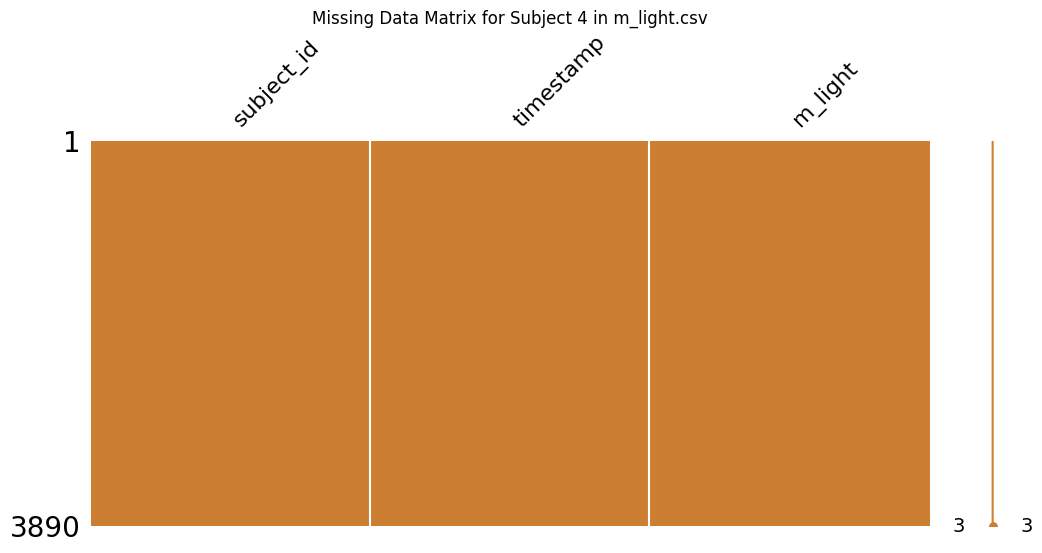

<Figure size 1200x500 with 0 Axes>

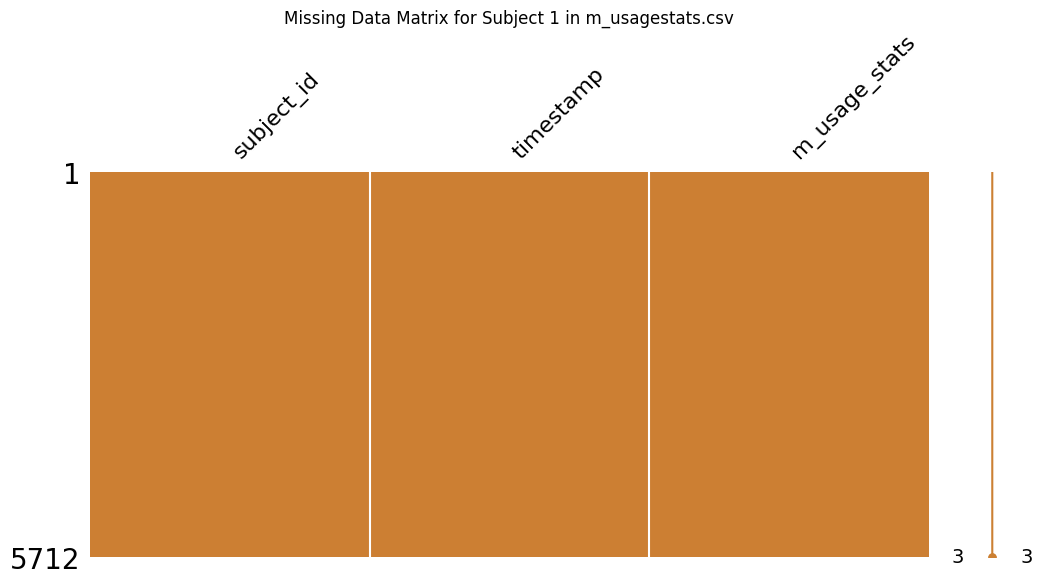

<Figure size 1200x500 with 0 Axes>

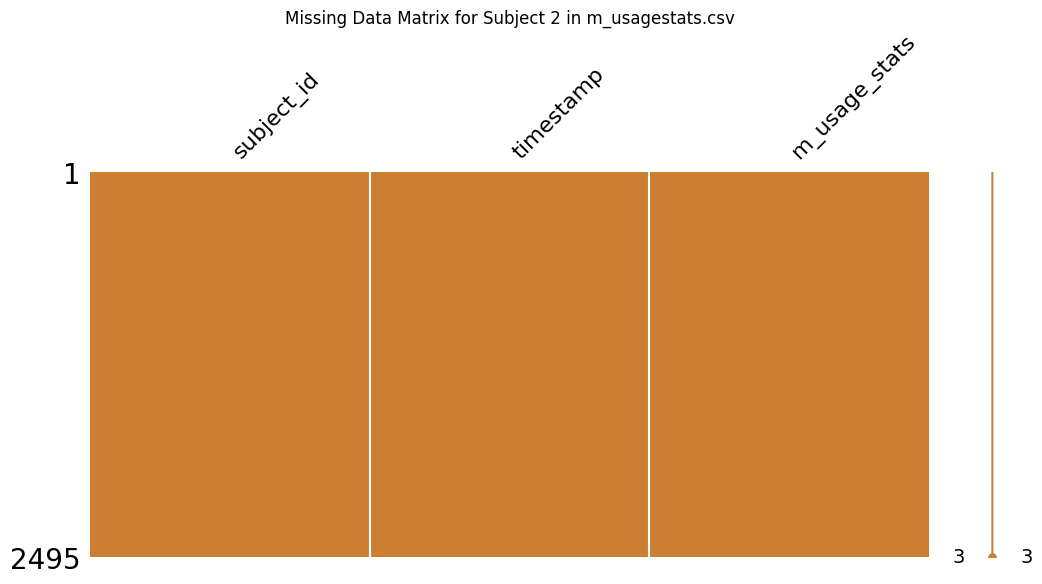

<Figure size 1200x500 with 0 Axes>

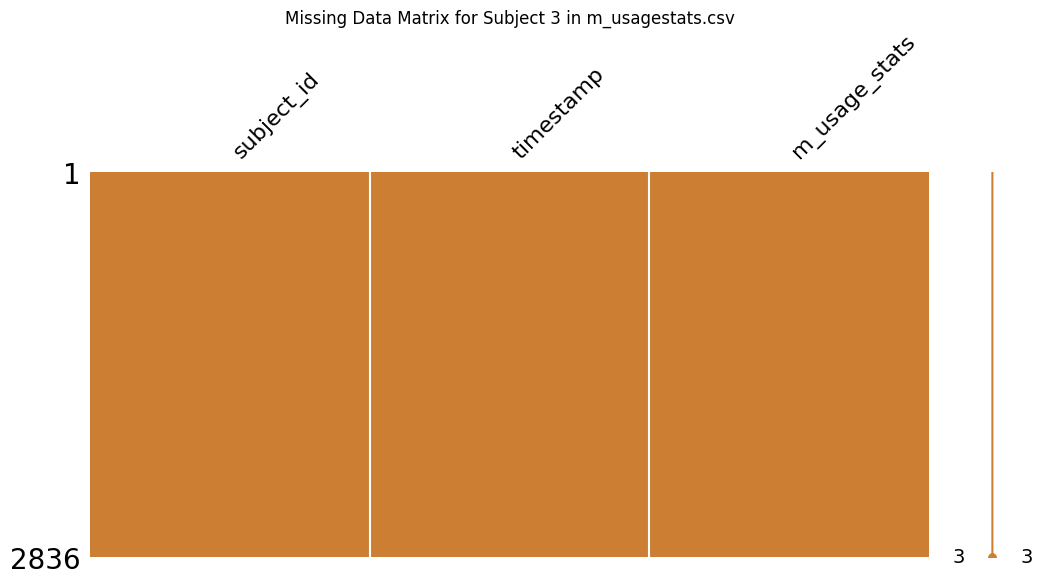

<Figure size 1200x500 with 0 Axes>

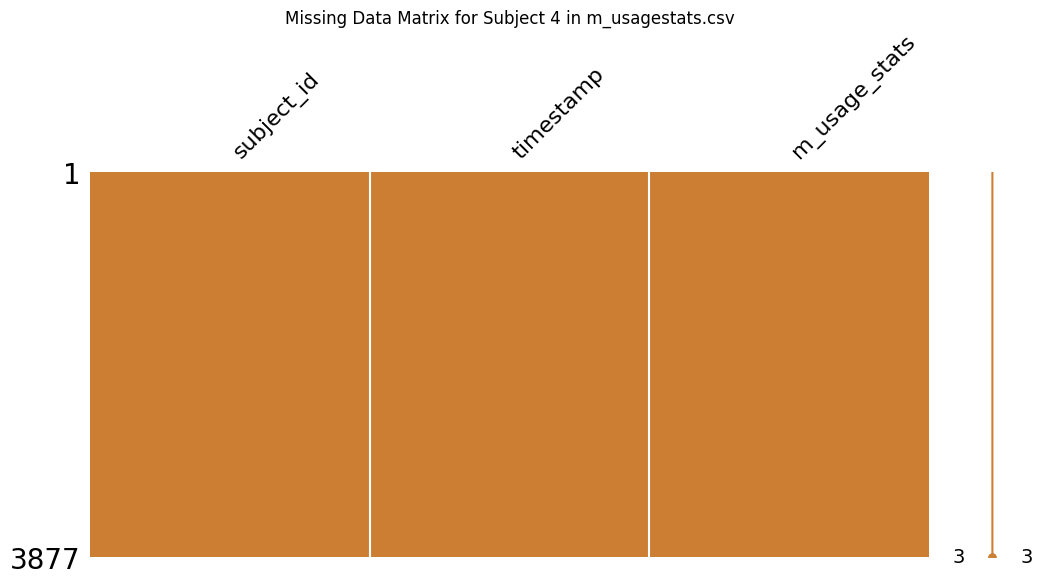

<Figure size 1200x500 with 0 Axes>

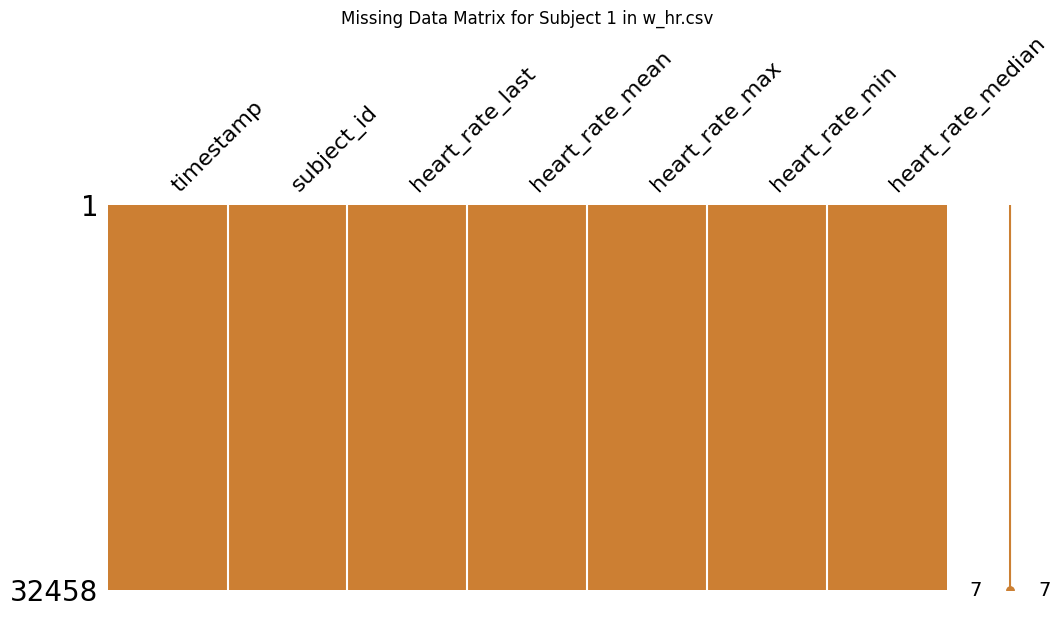

<Figure size 1200x500 with 0 Axes>

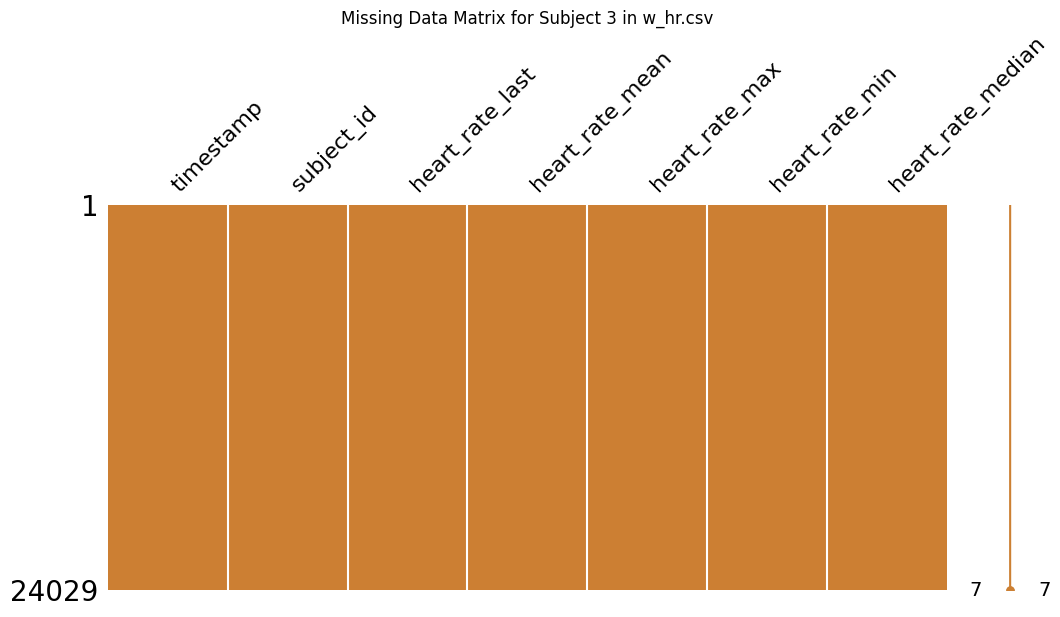

<Figure size 1200x500 with 0 Axes>

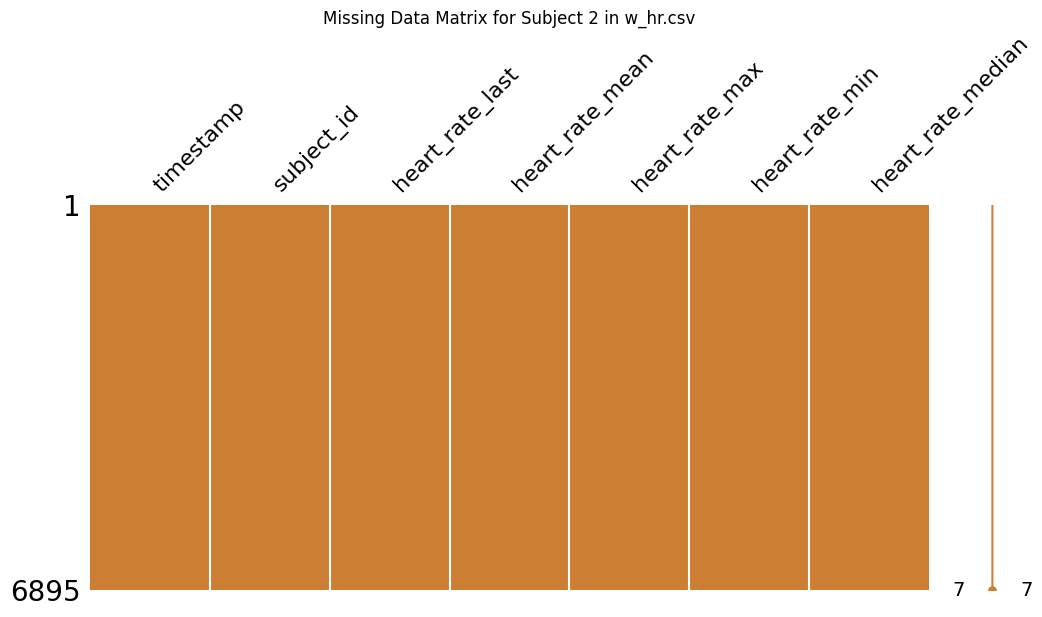

<Figure size 1200x500 with 0 Axes>

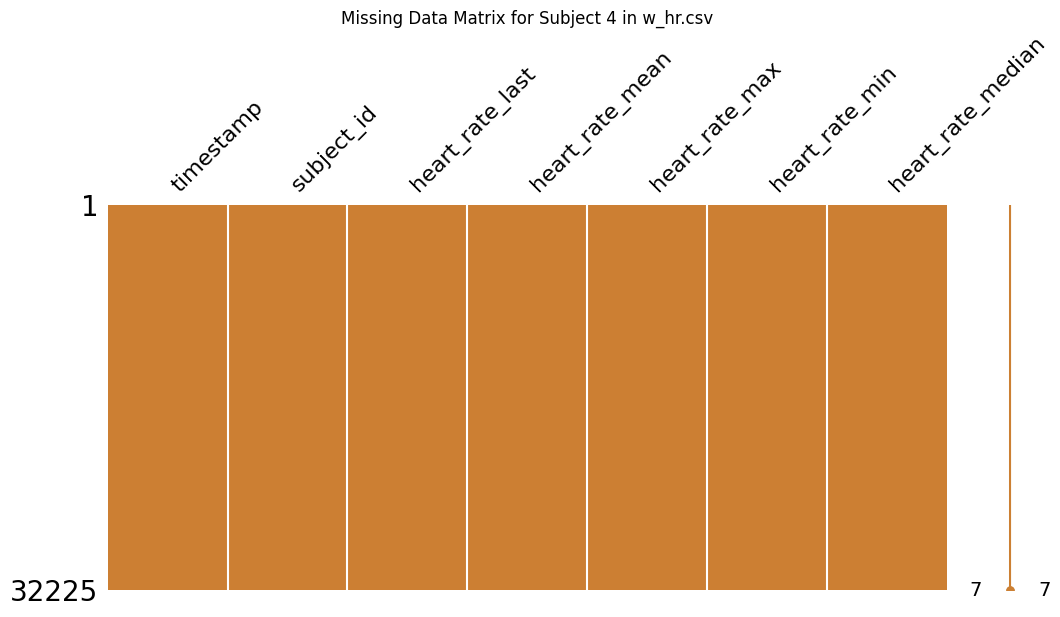

<Figure size 1200x500 with 0 Axes>

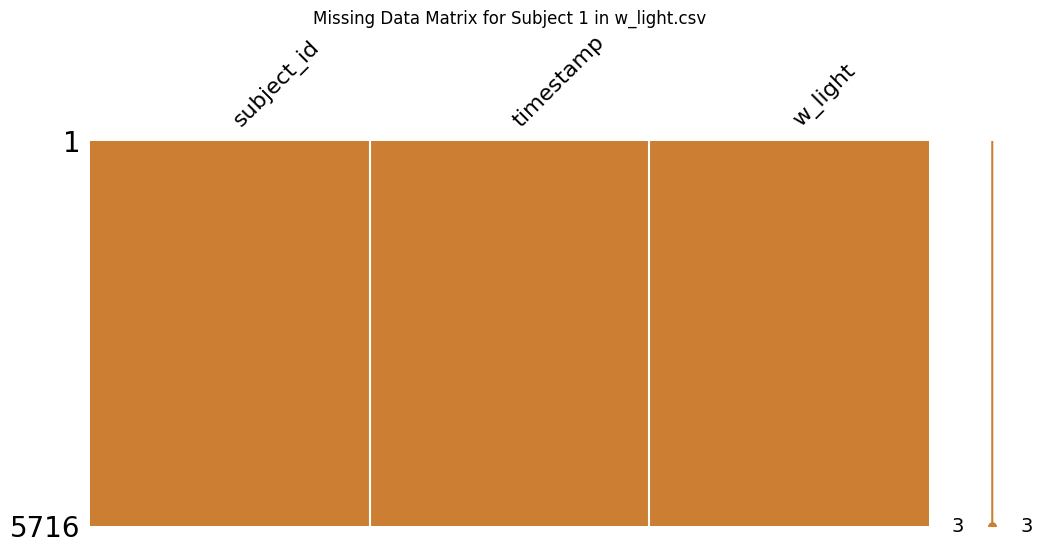

<Figure size 1200x500 with 0 Axes>

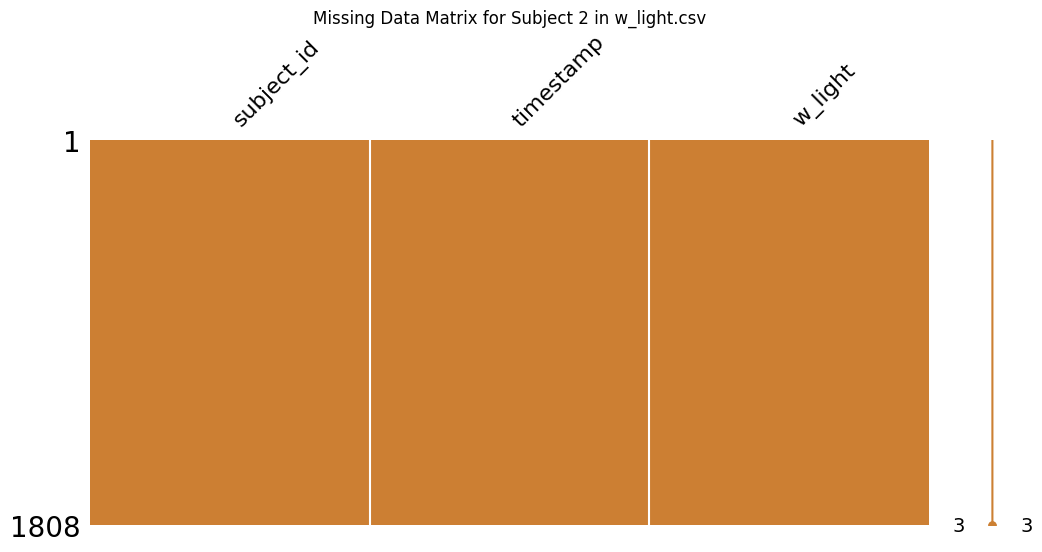

<Figure size 1200x500 with 0 Axes>

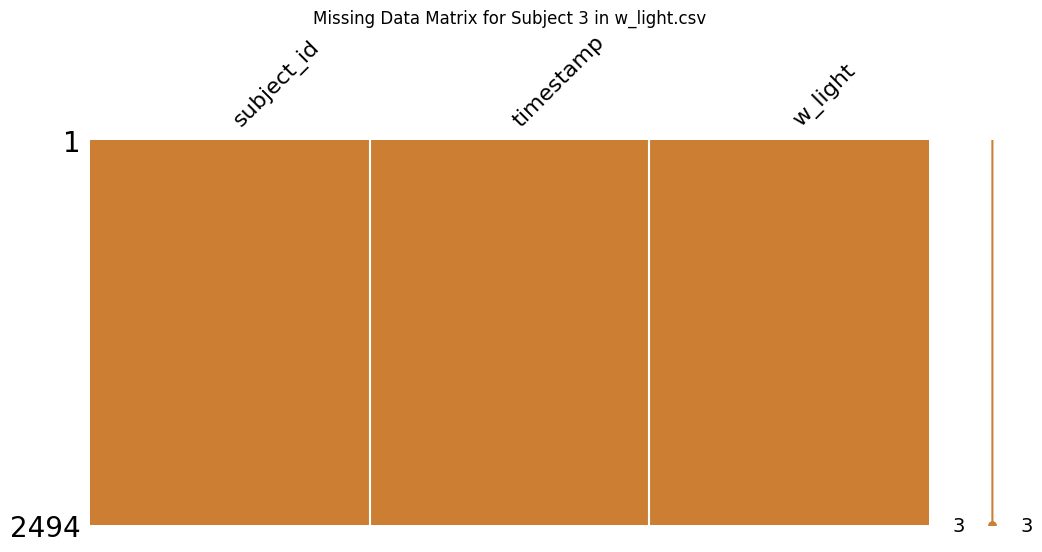

<Figure size 1200x500 with 0 Axes>

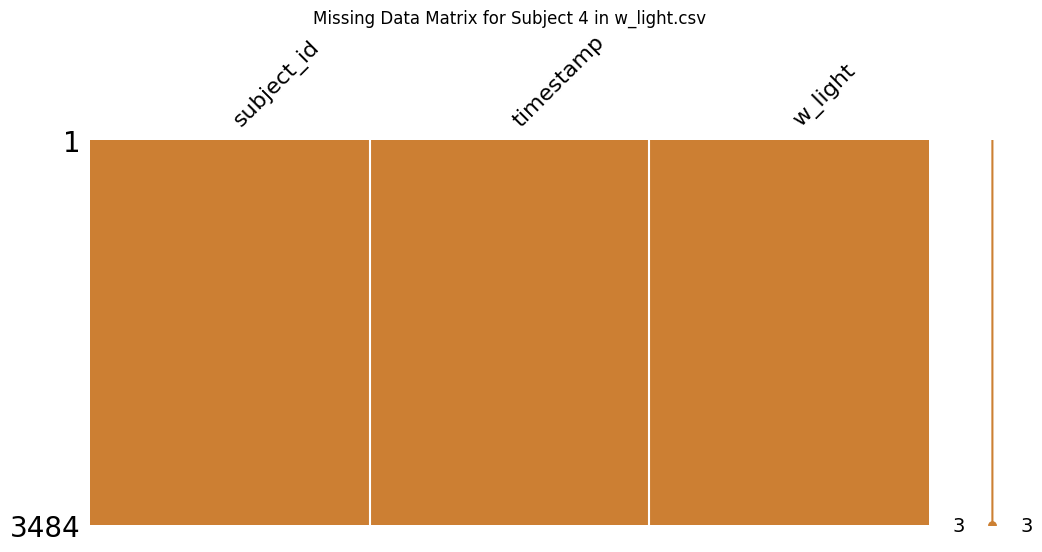

<Figure size 1200x500 with 0 Axes>

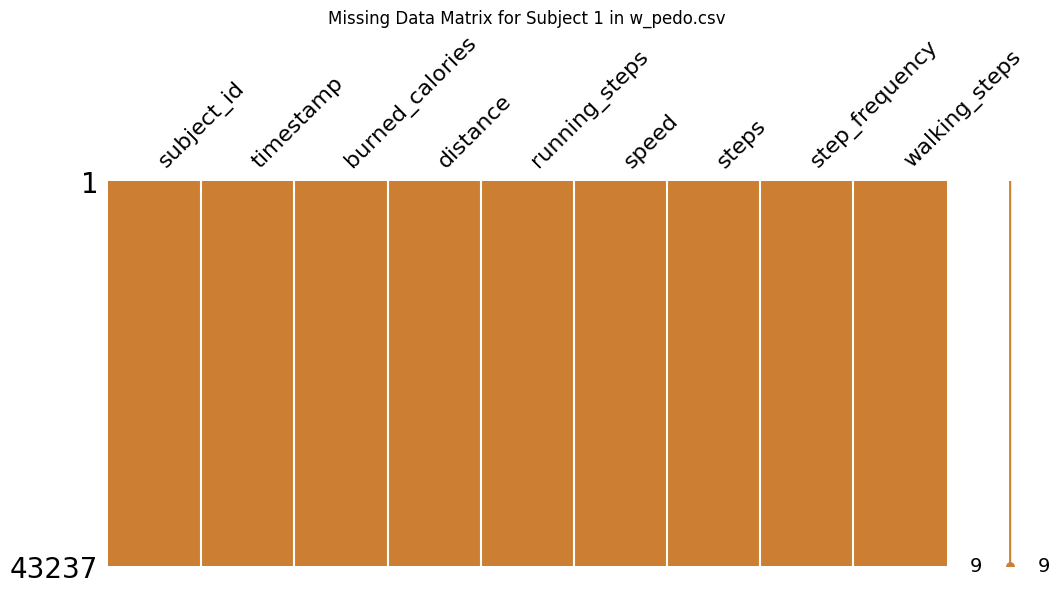

<Figure size 1200x500 with 0 Axes>

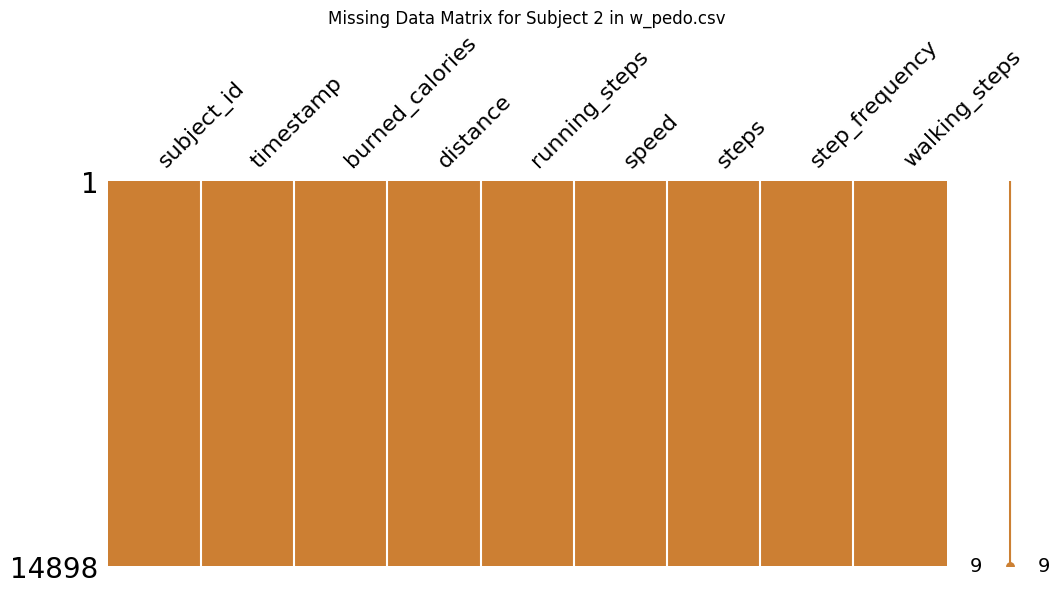

<Figure size 1200x500 with 0 Axes>

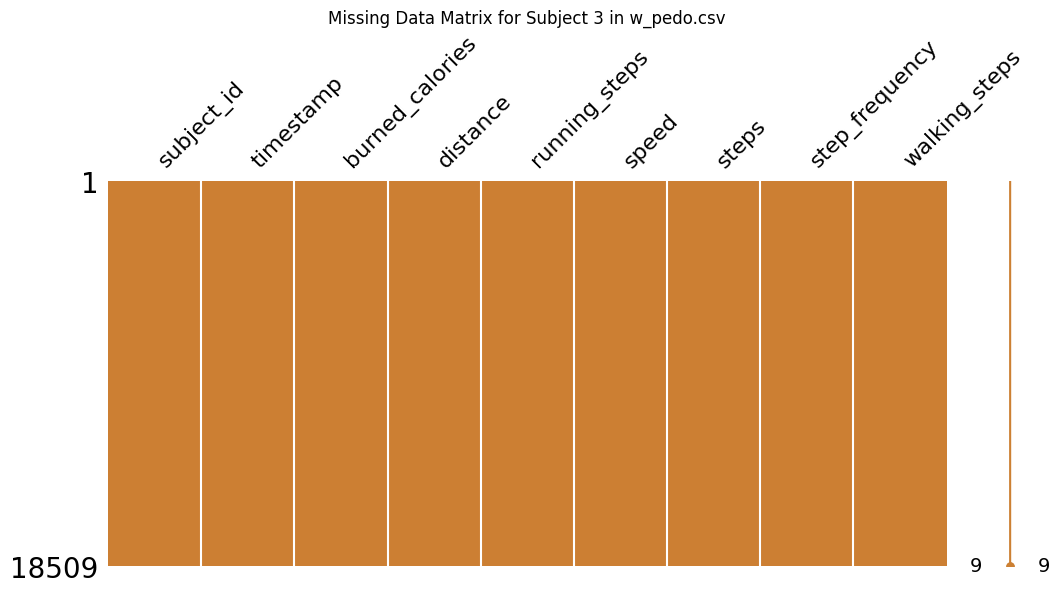

<Figure size 1200x500 with 0 Axes>

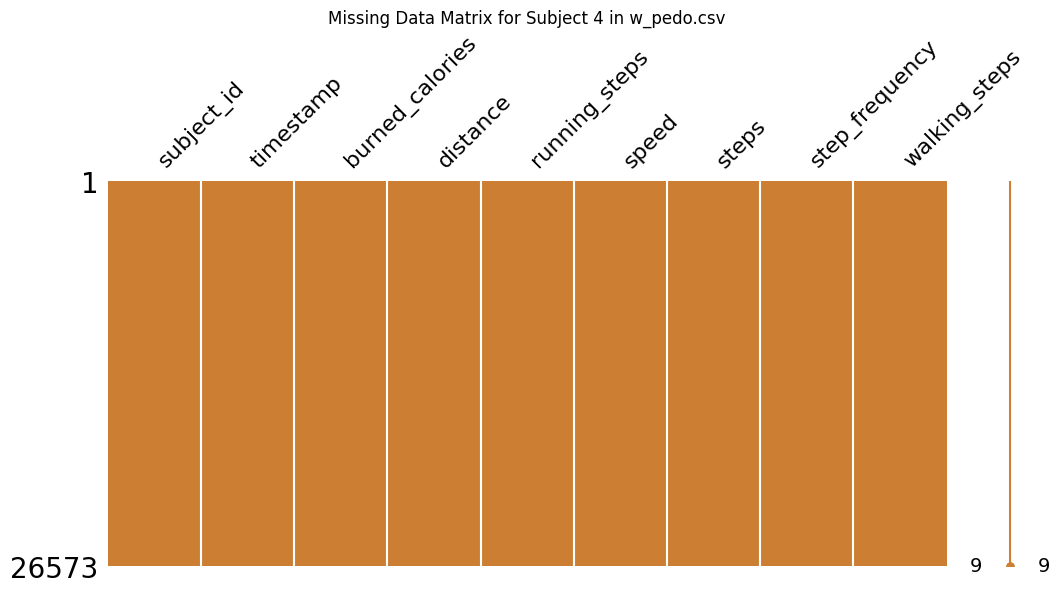

<Figure size 1200x500 with 0 Axes>

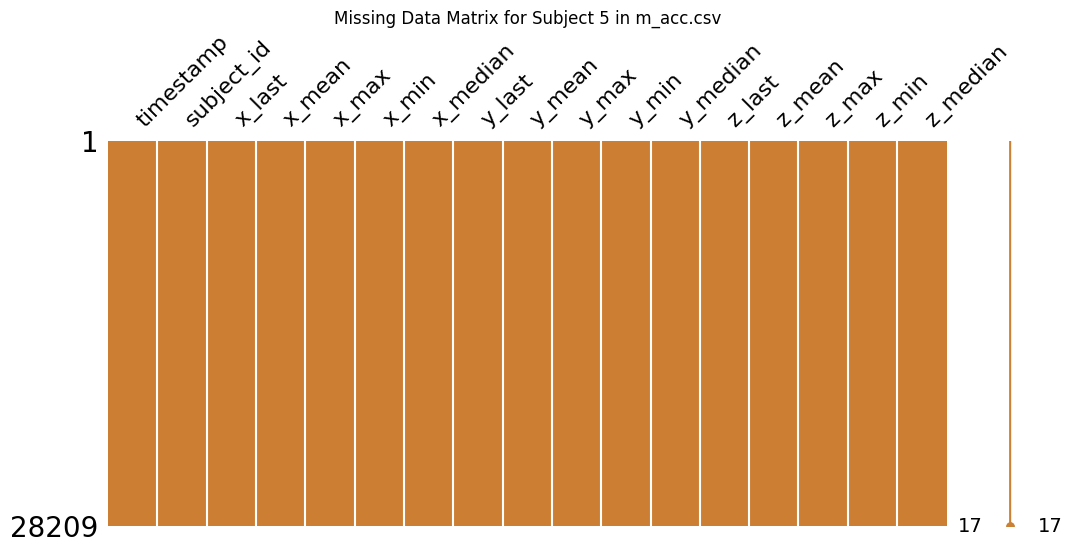

<Figure size 1200x500 with 0 Axes>

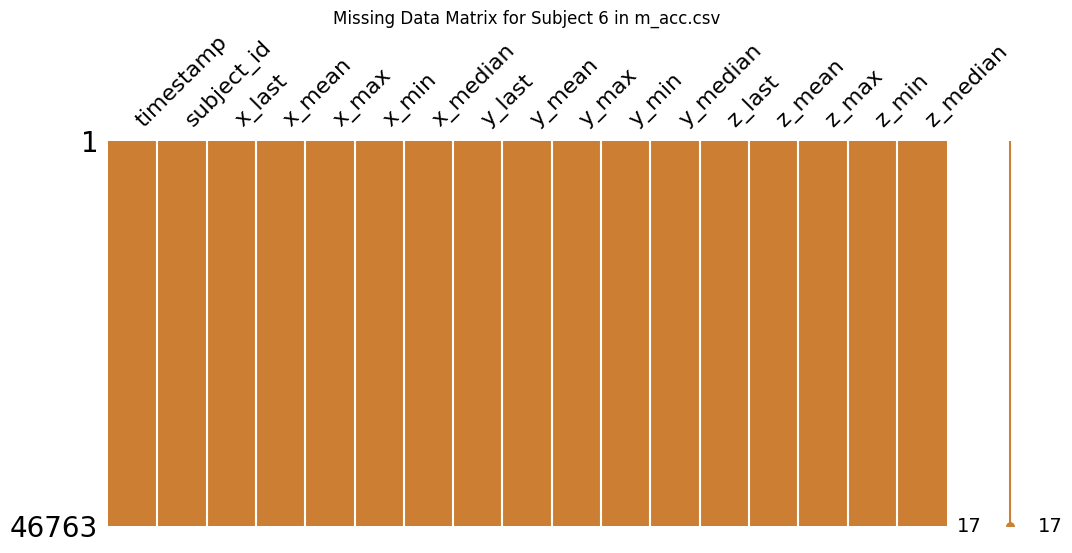

<Figure size 1200x500 with 0 Axes>

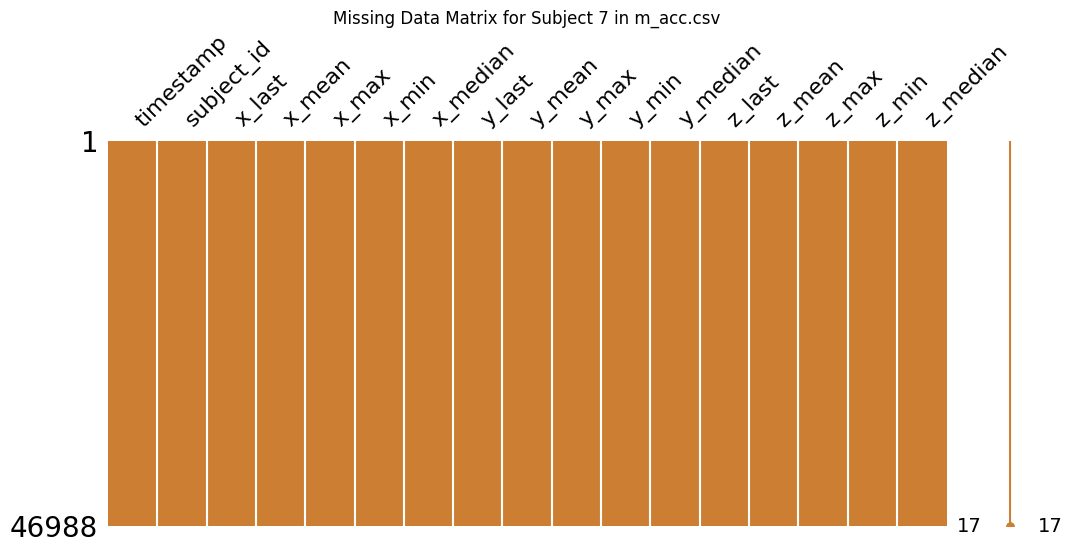

<Figure size 1200x500 with 0 Axes>

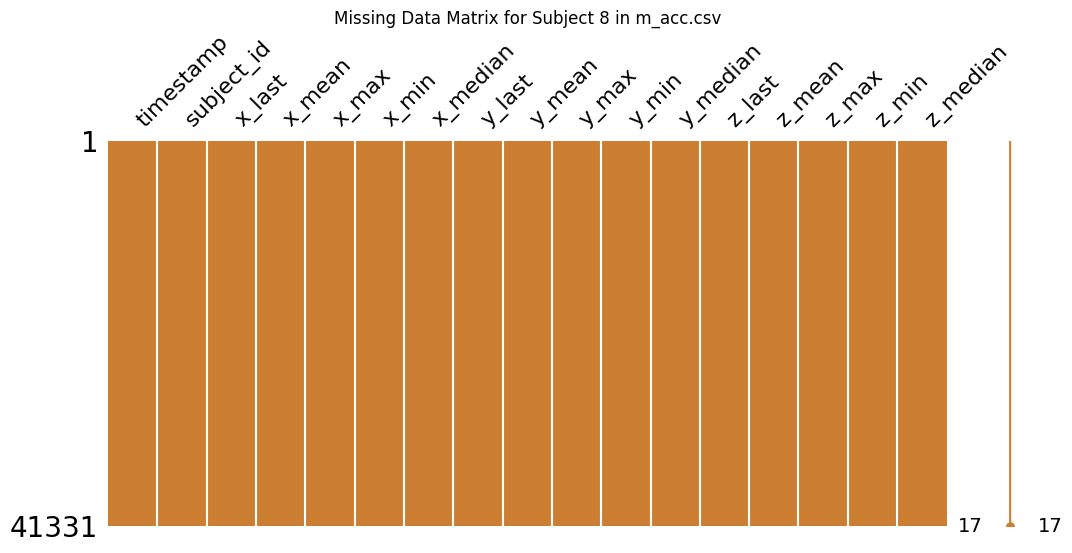

<Figure size 1200x500 with 0 Axes>

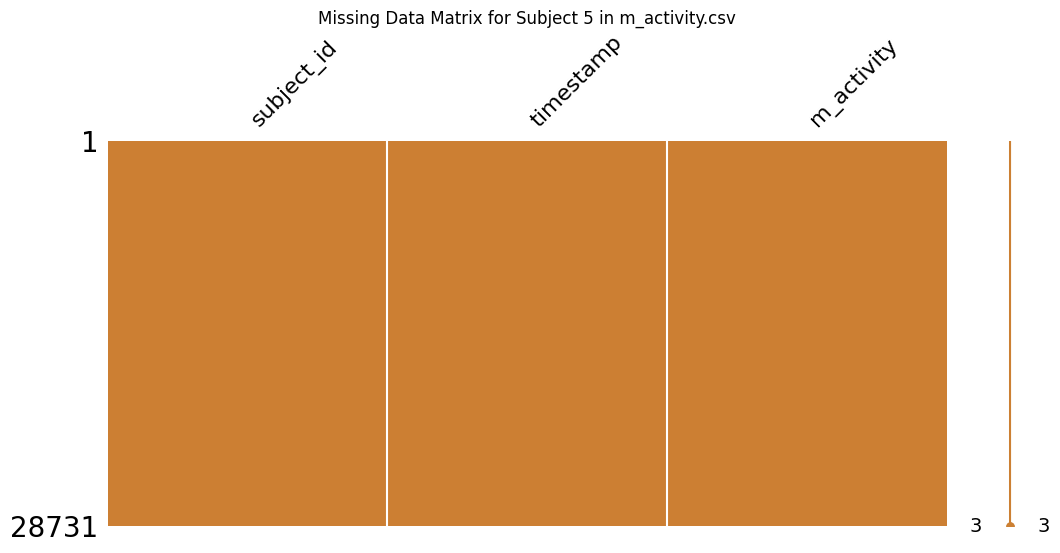

<Figure size 1200x500 with 0 Axes>

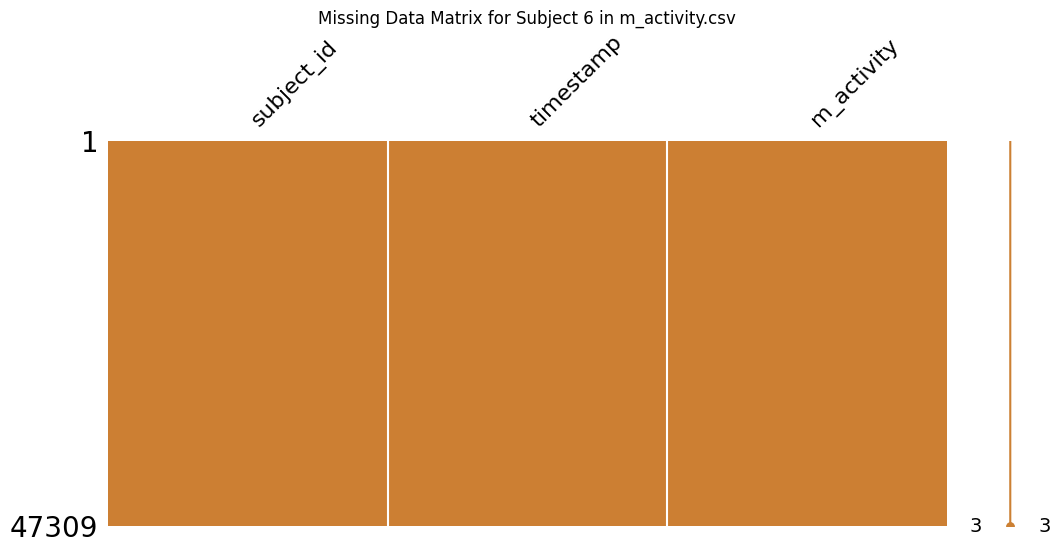

<Figure size 1200x500 with 0 Axes>

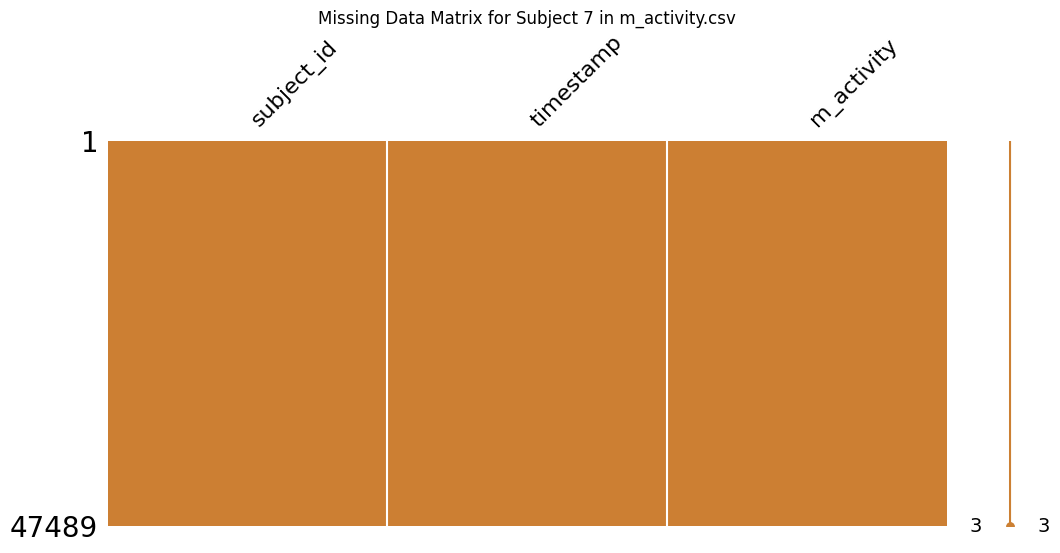

<Figure size 1200x500 with 0 Axes>

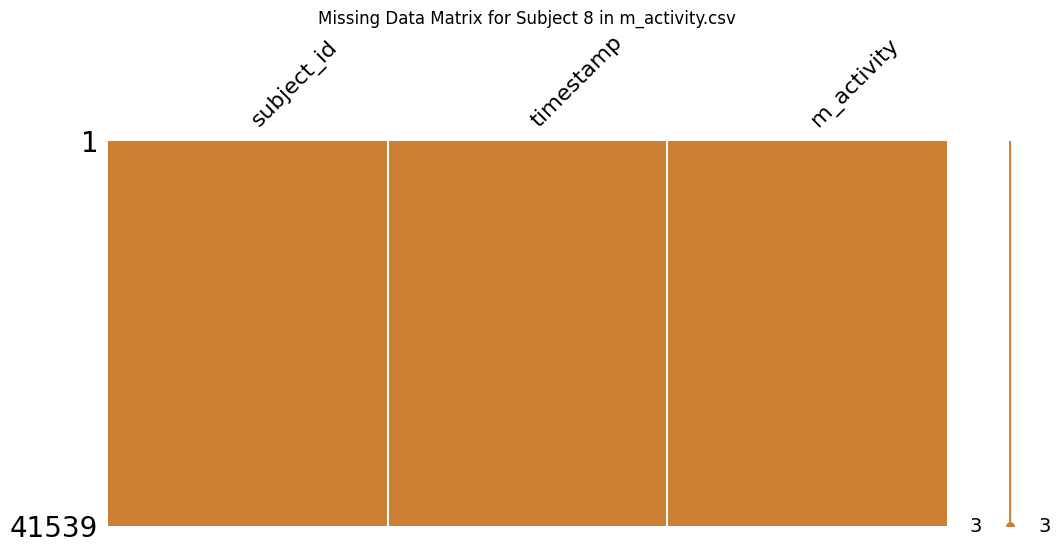

<Figure size 1200x500 with 0 Axes>

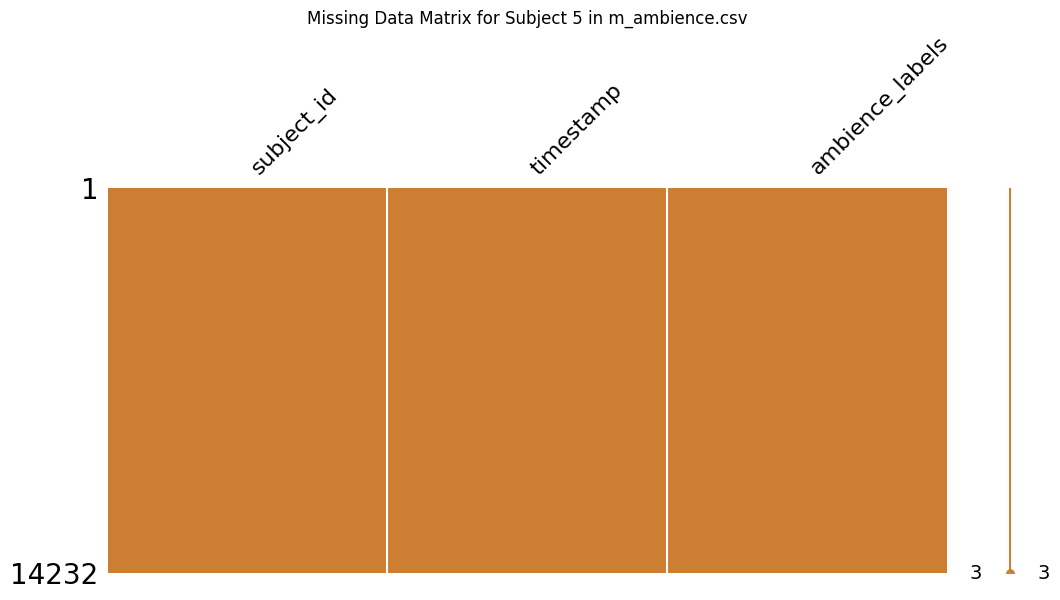

<Figure size 1200x500 with 0 Axes>

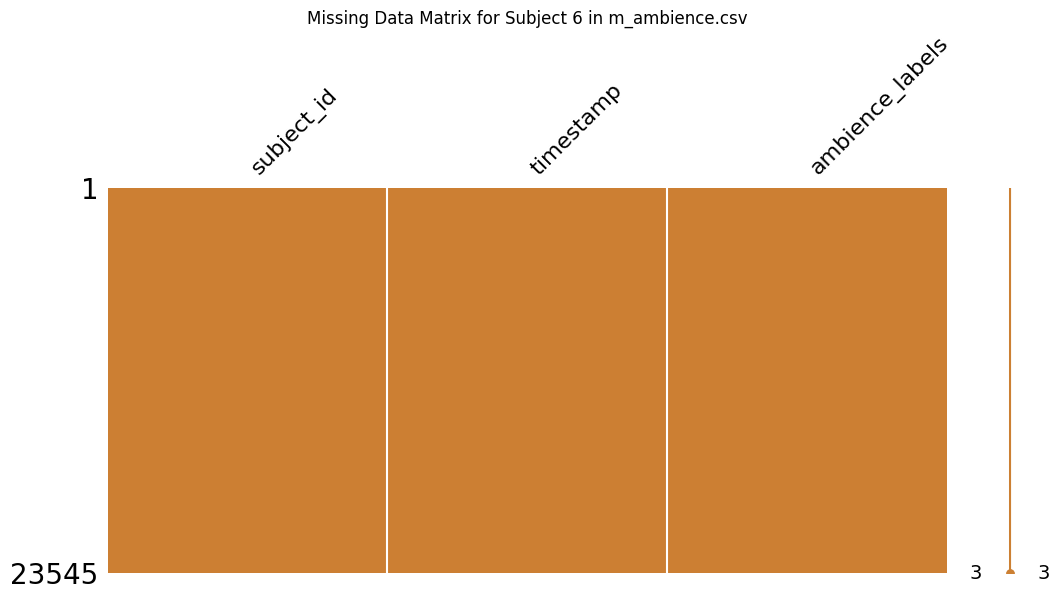

<Figure size 1200x500 with 0 Axes>

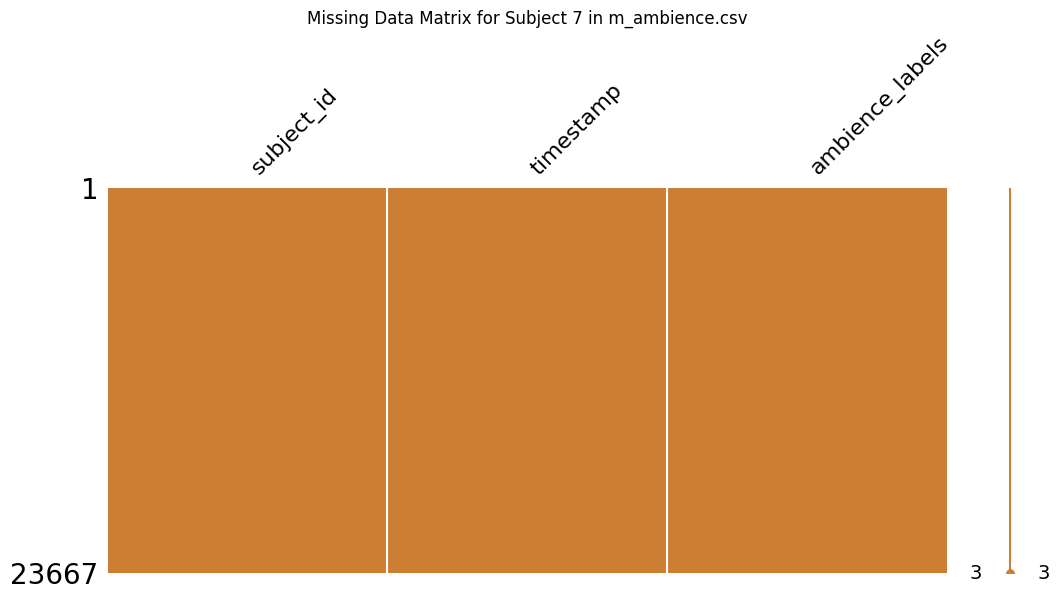

<Figure size 1200x500 with 0 Axes>

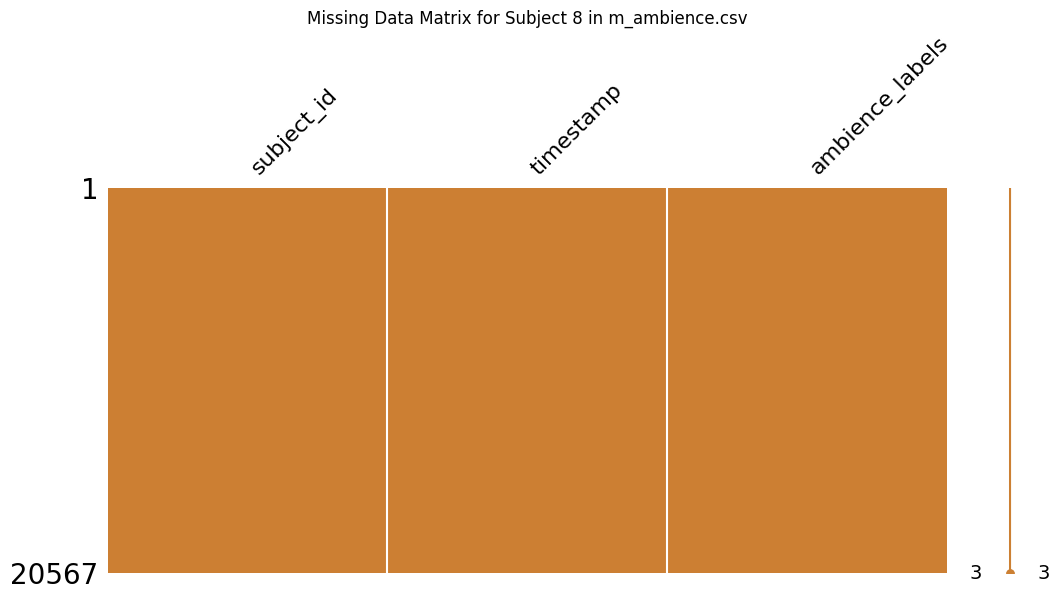

<Figure size 1200x500 with 0 Axes>

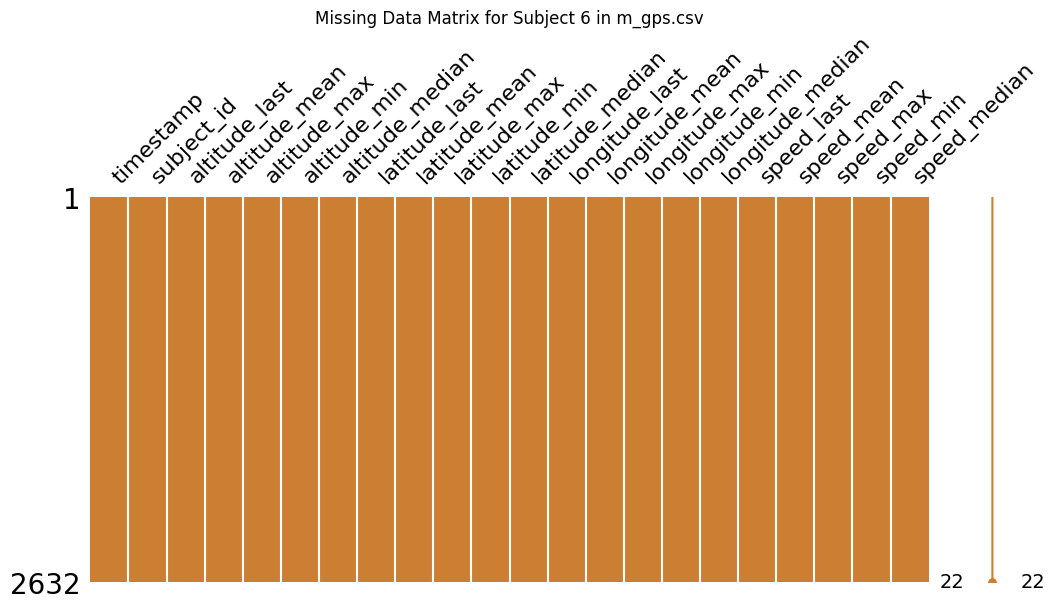

<Figure size 1200x500 with 0 Axes>

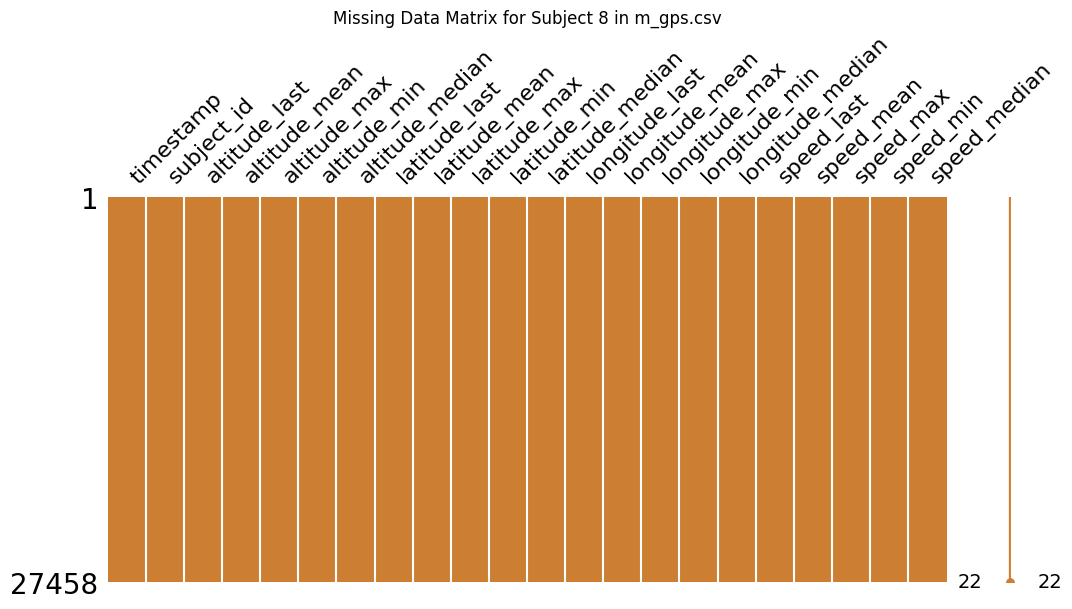

<Figure size 1200x500 with 0 Axes>

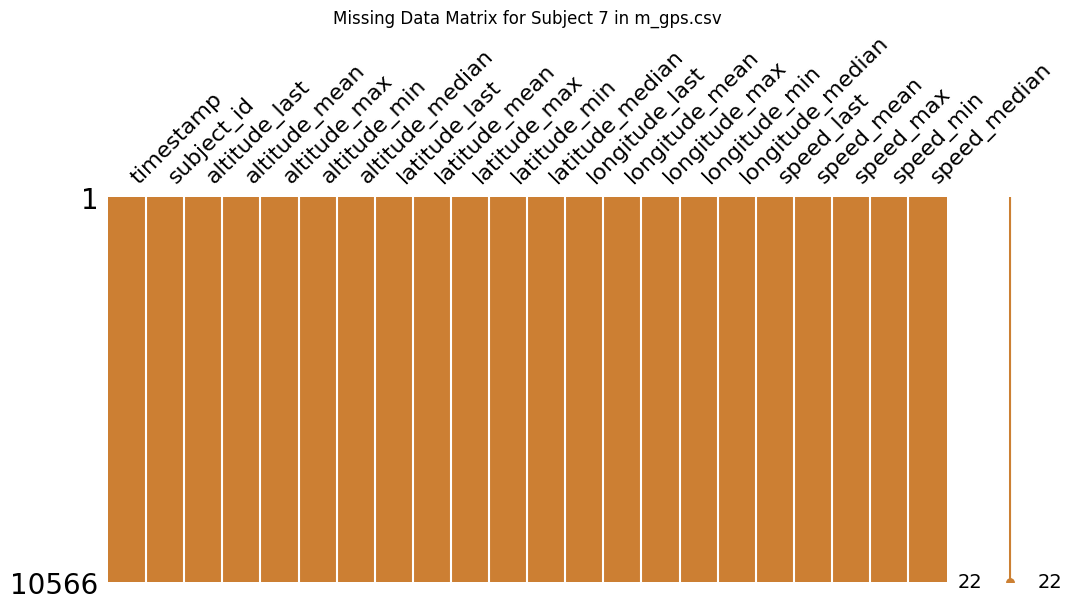

<Figure size 1200x500 with 0 Axes>

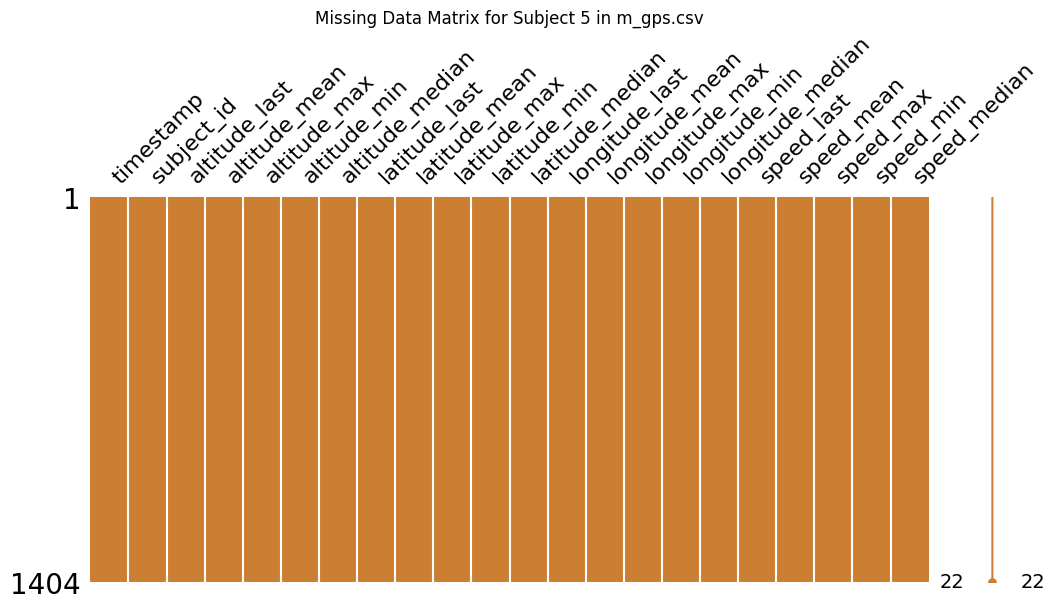

<Figure size 1200x500 with 0 Axes>

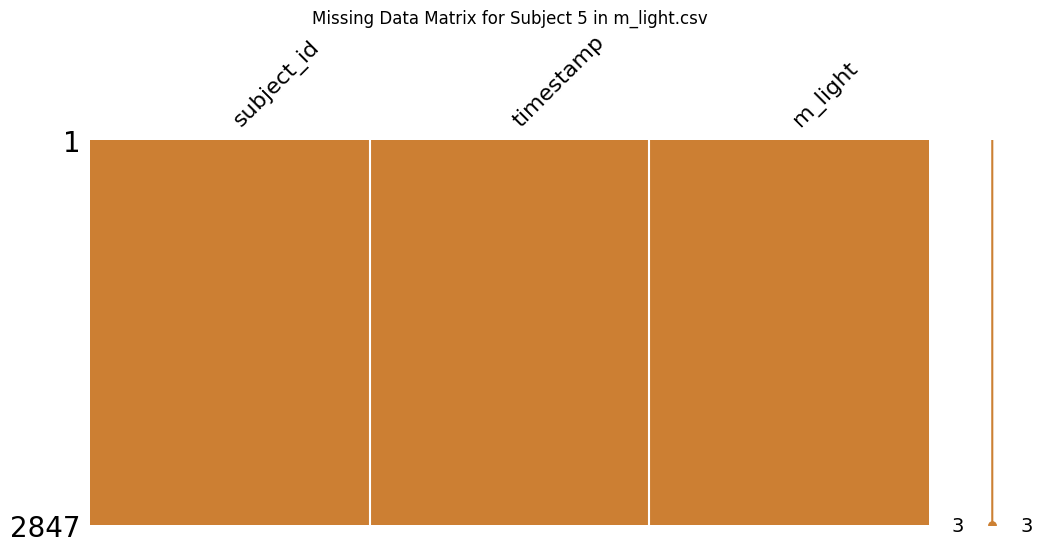

<Figure size 1200x500 with 0 Axes>

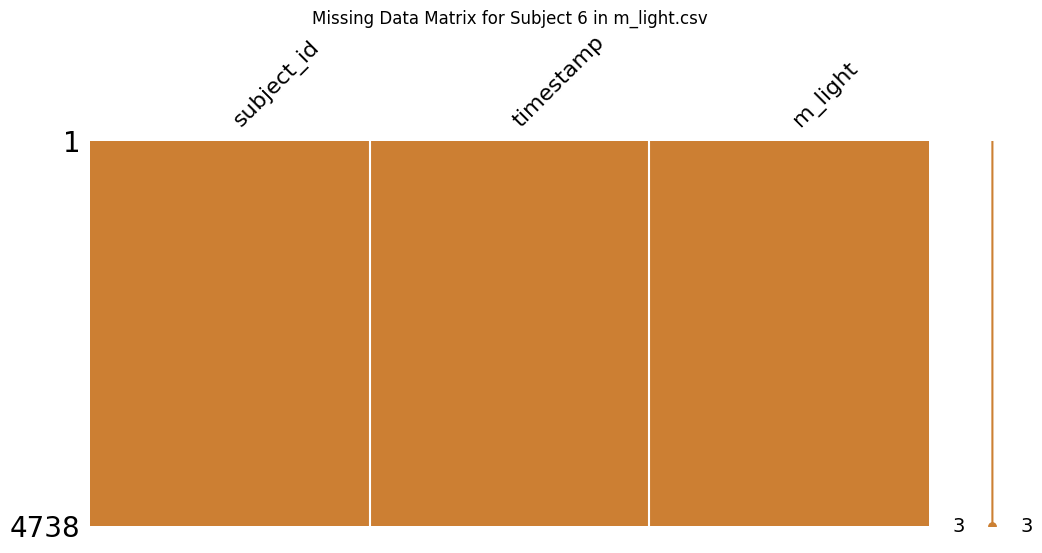

<Figure size 1200x500 with 0 Axes>

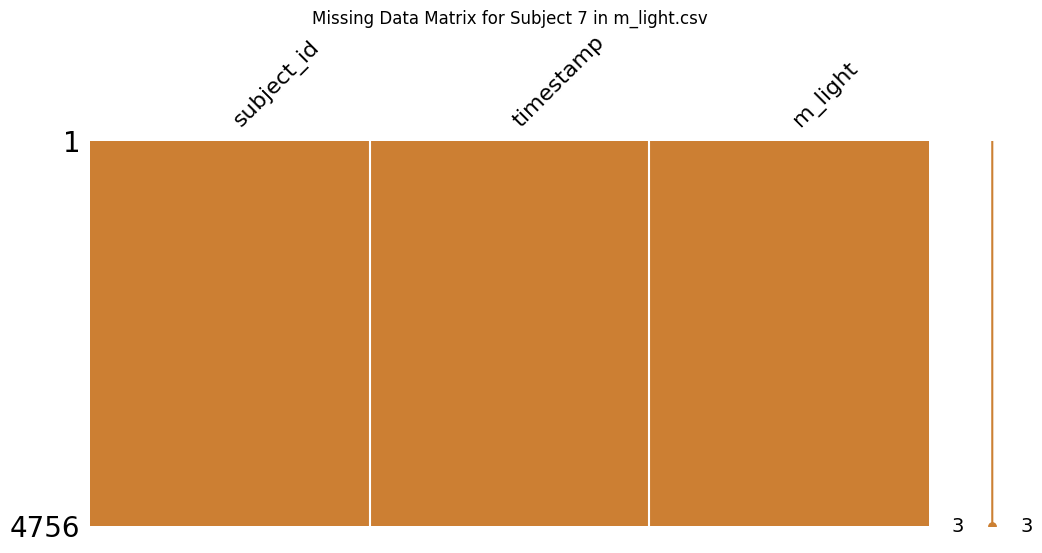

<Figure size 1200x500 with 0 Axes>

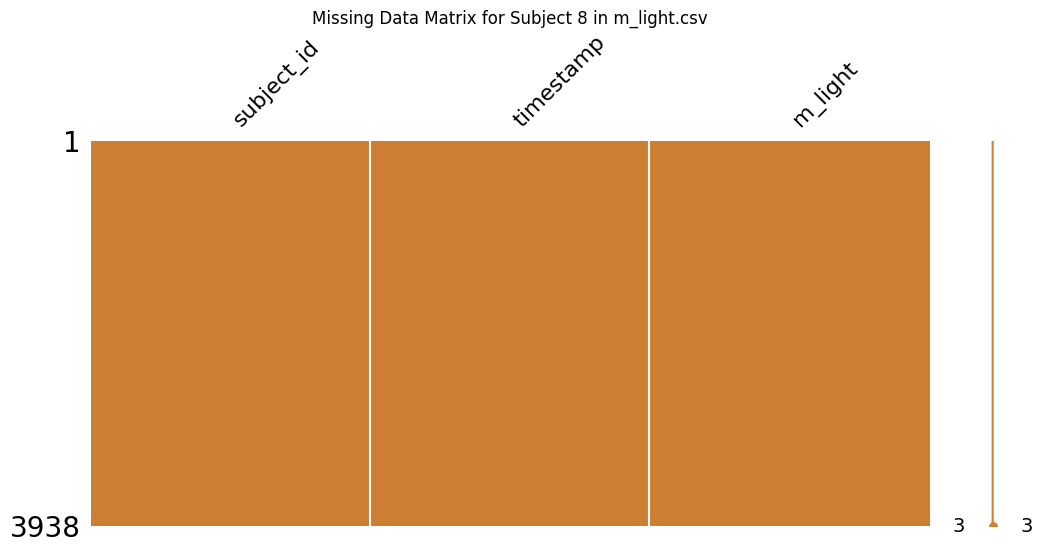

<Figure size 1200x500 with 0 Axes>

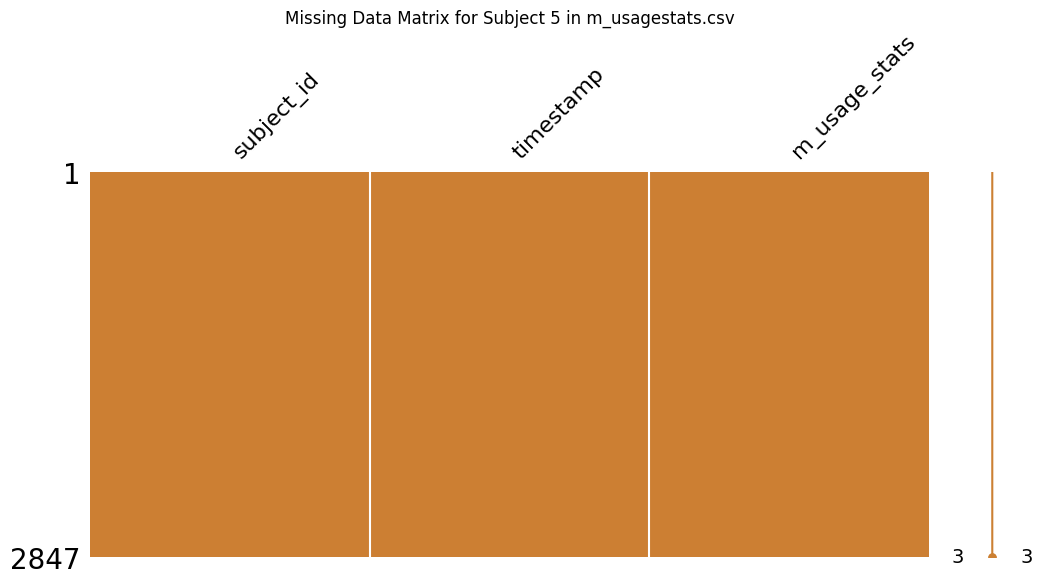

<Figure size 1200x500 with 0 Axes>

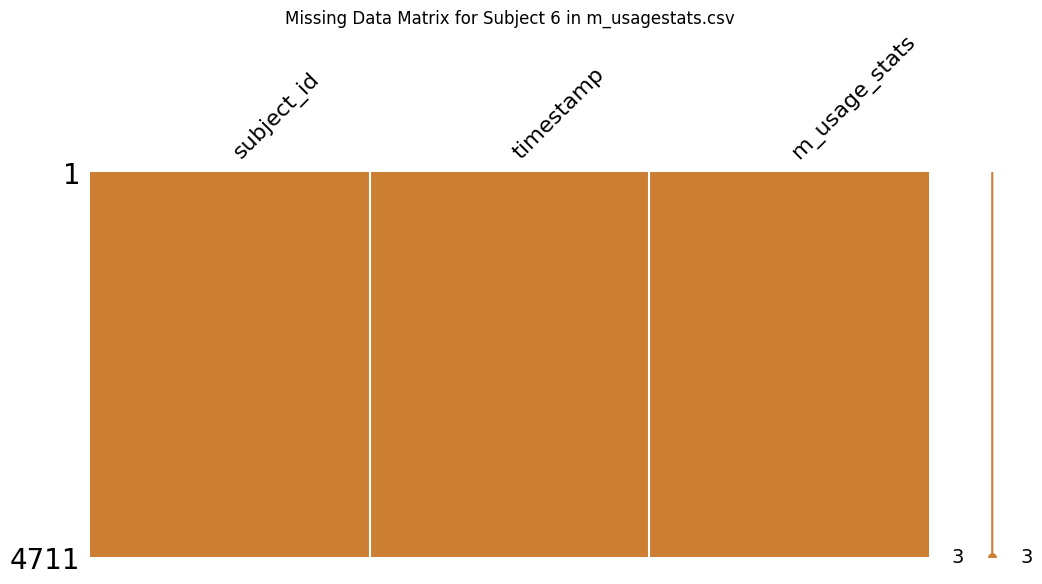

<Figure size 1200x500 with 0 Axes>

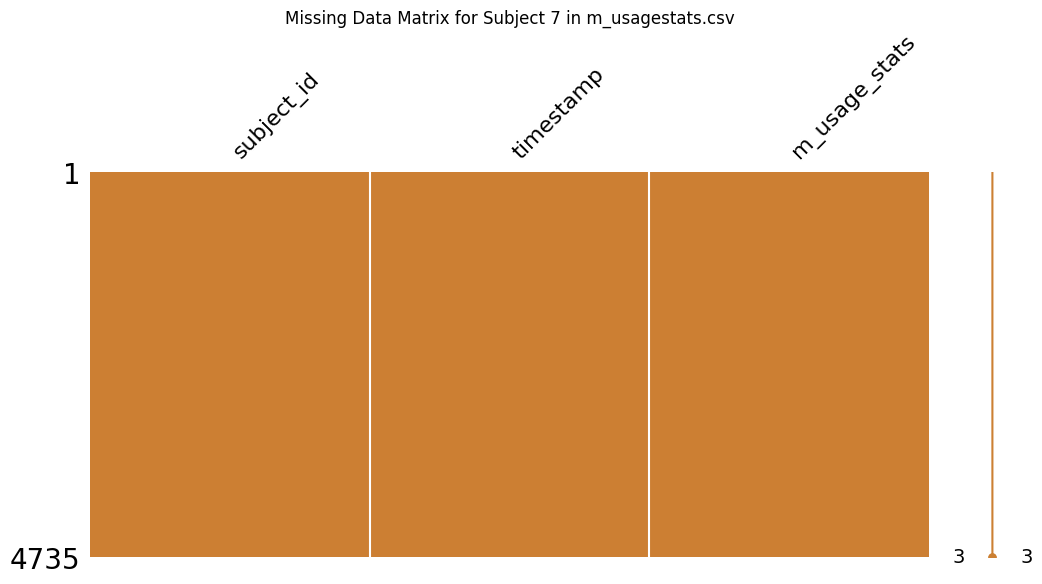

<Figure size 1200x500 with 0 Axes>

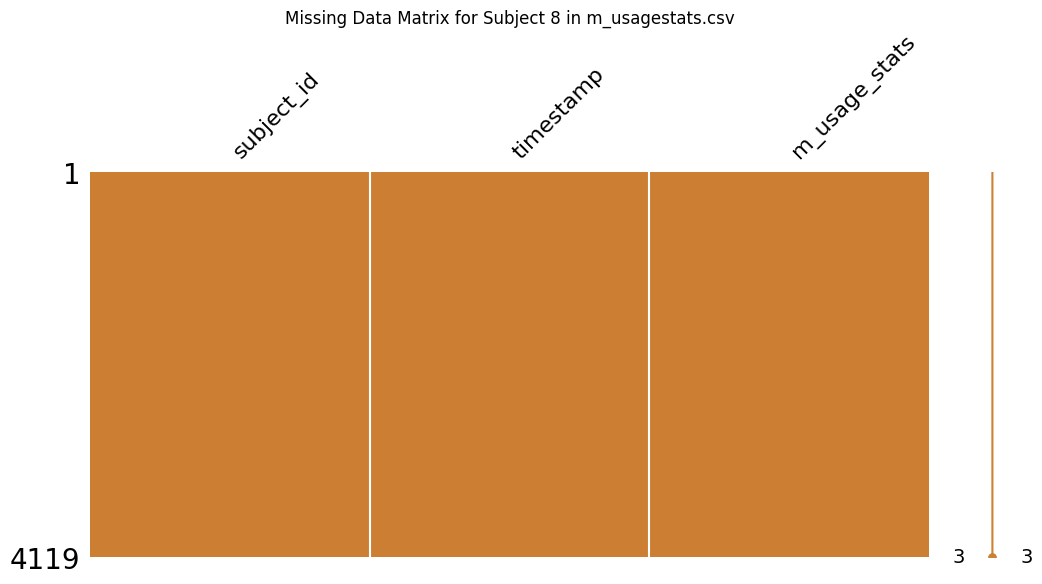

<Figure size 1200x500 with 0 Axes>

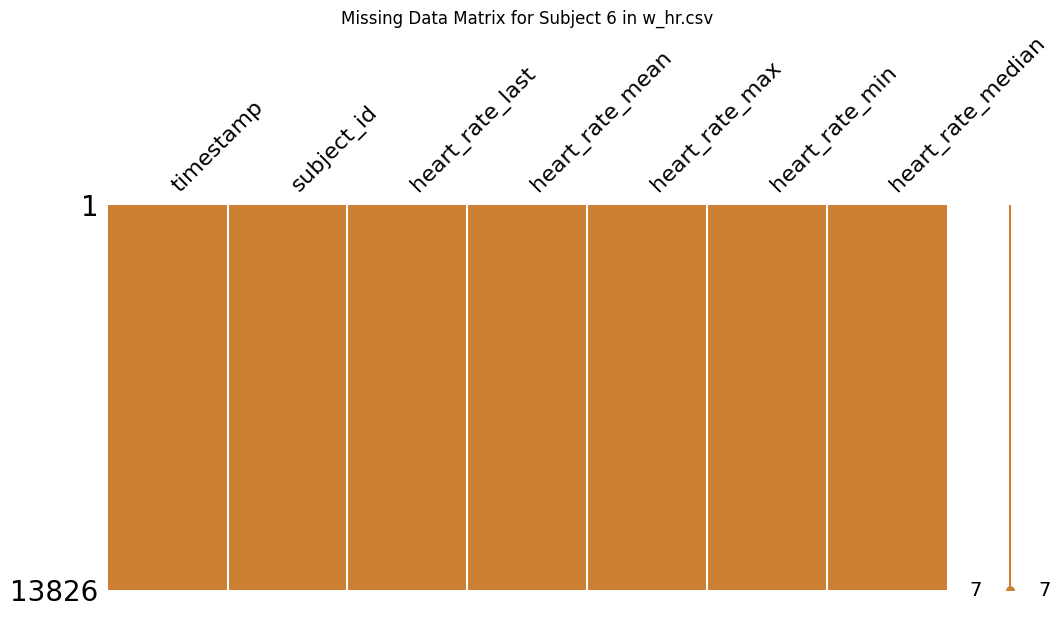

<Figure size 1200x500 with 0 Axes>

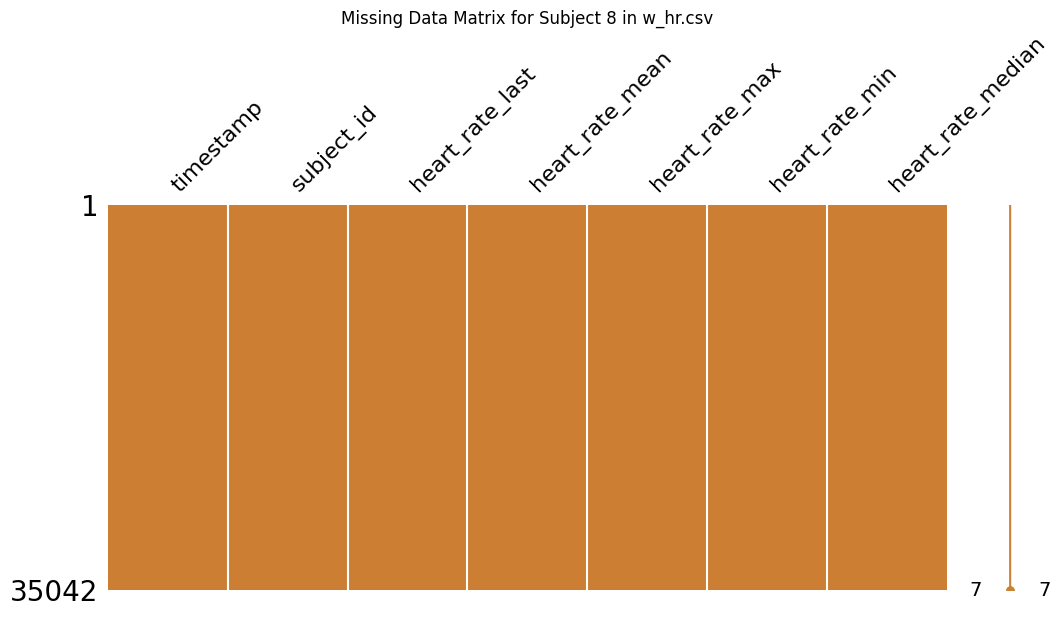

<Figure size 1200x500 with 0 Axes>

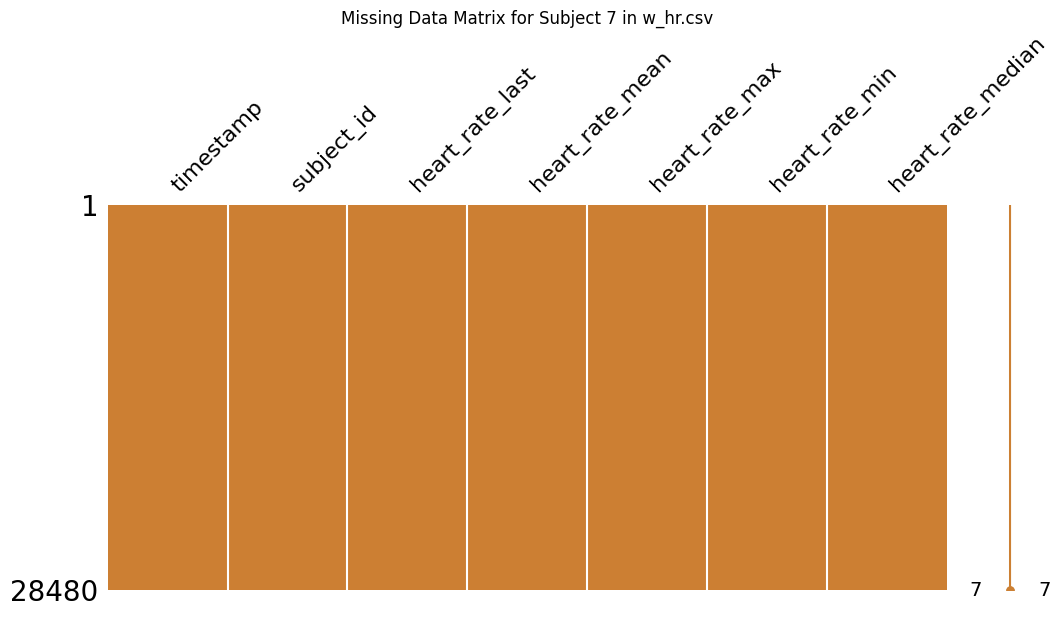

<Figure size 1200x500 with 0 Axes>

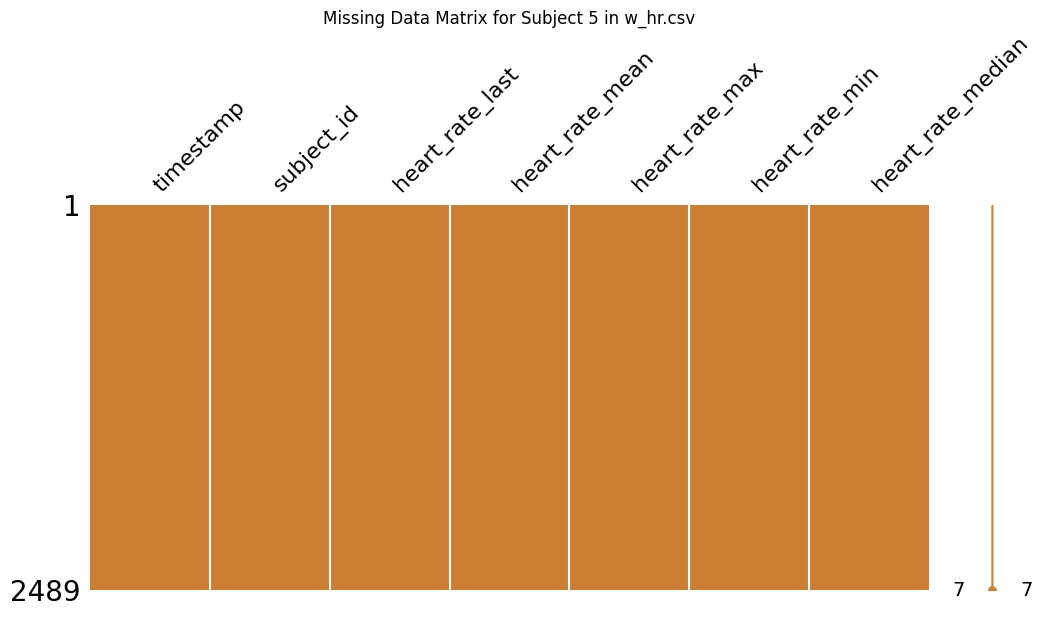

<Figure size 1200x500 with 0 Axes>

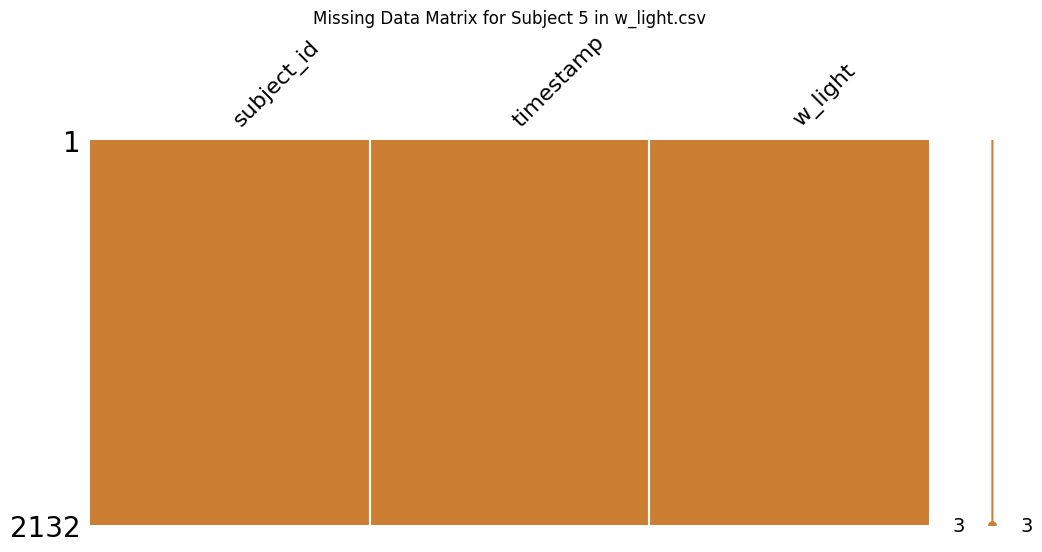

<Figure size 1200x500 with 0 Axes>

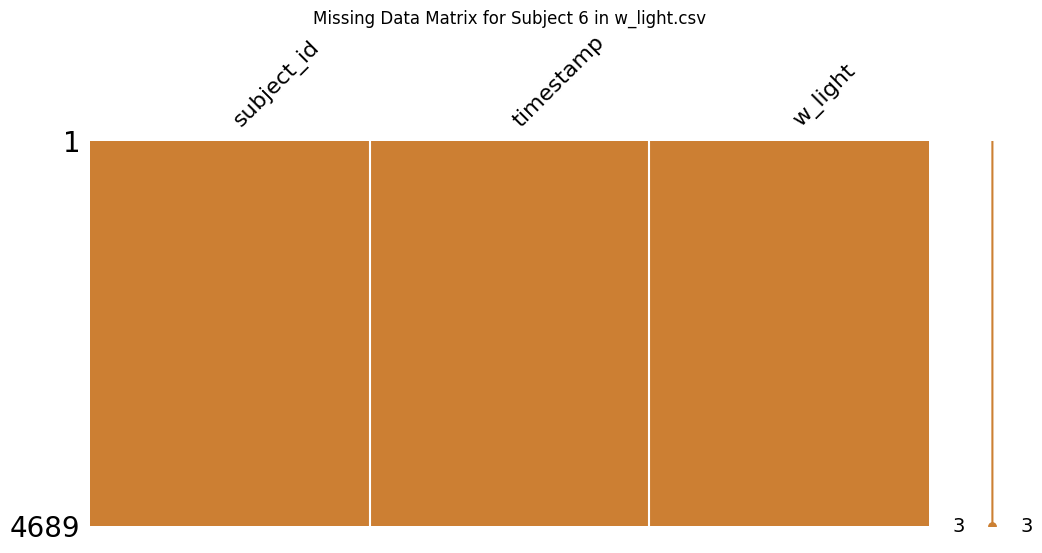

<Figure size 1200x500 with 0 Axes>

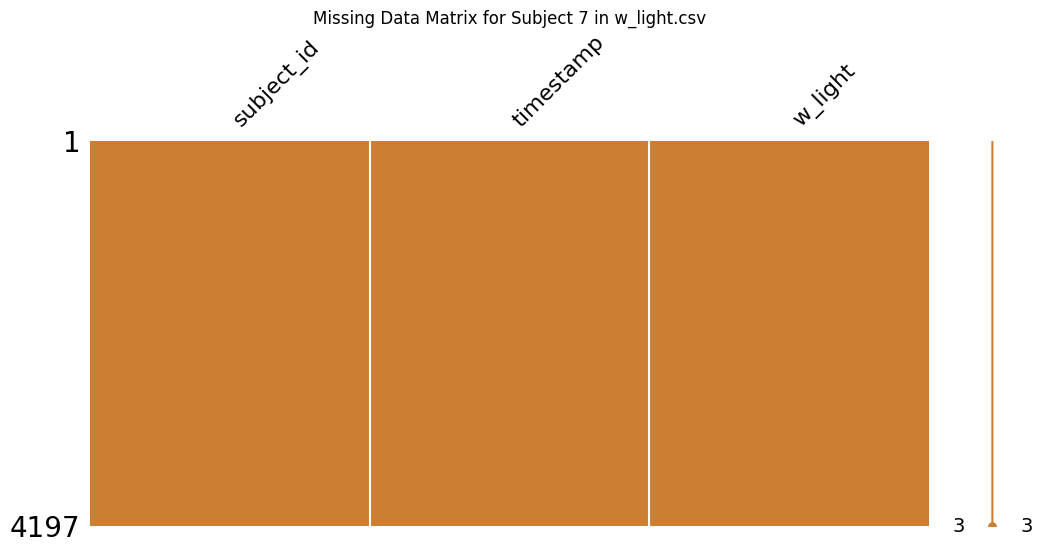

<Figure size 1200x500 with 0 Axes>

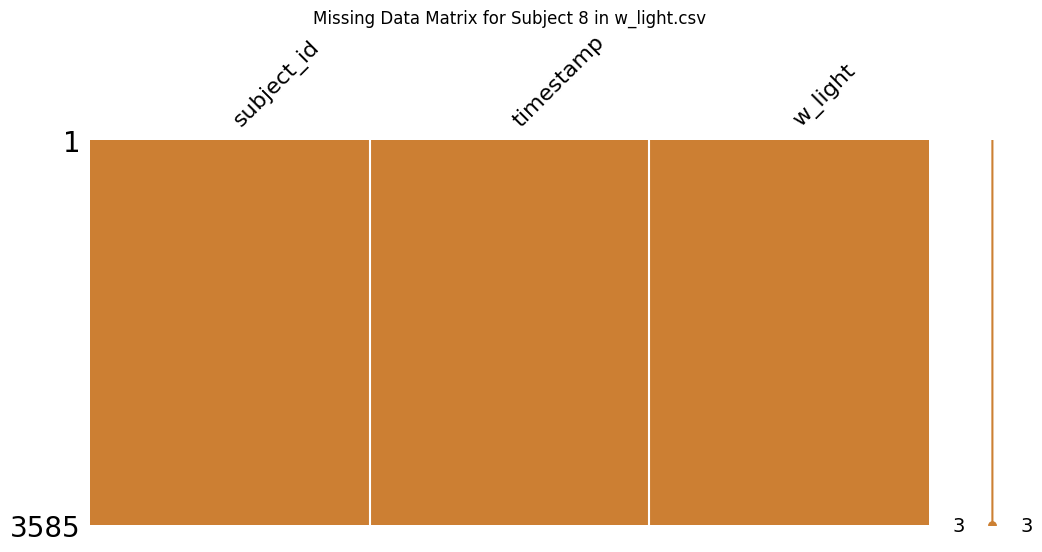

<Figure size 1200x500 with 0 Axes>

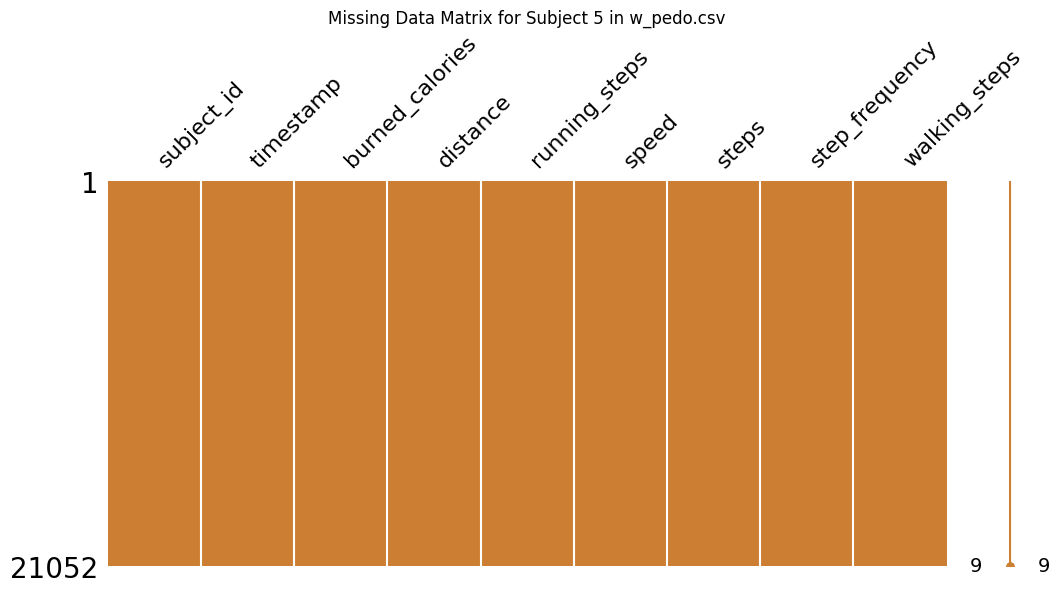

<Figure size 1200x500 with 0 Axes>

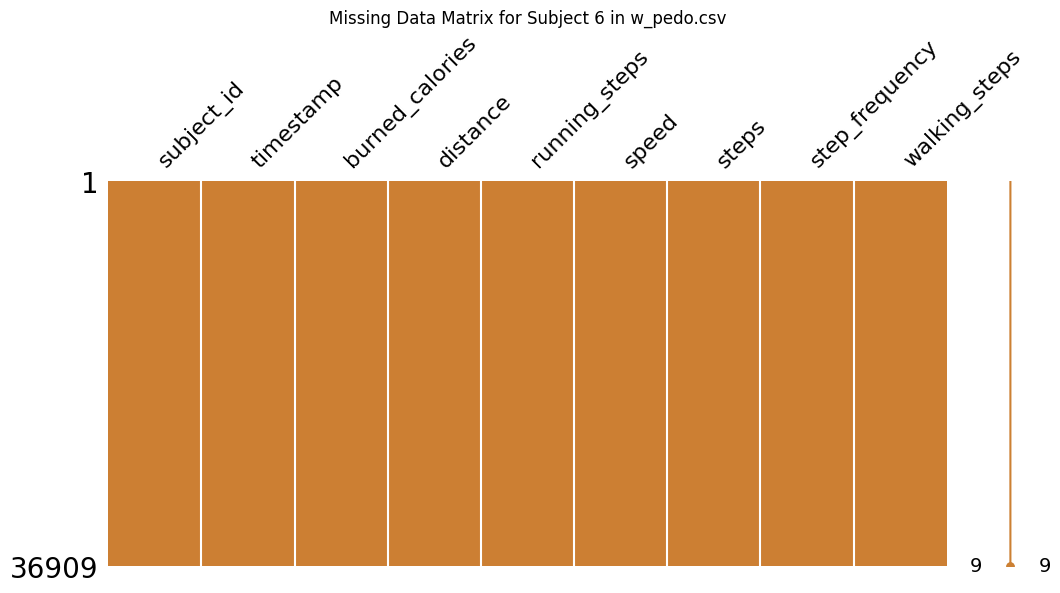

<Figure size 1200x500 with 0 Axes>

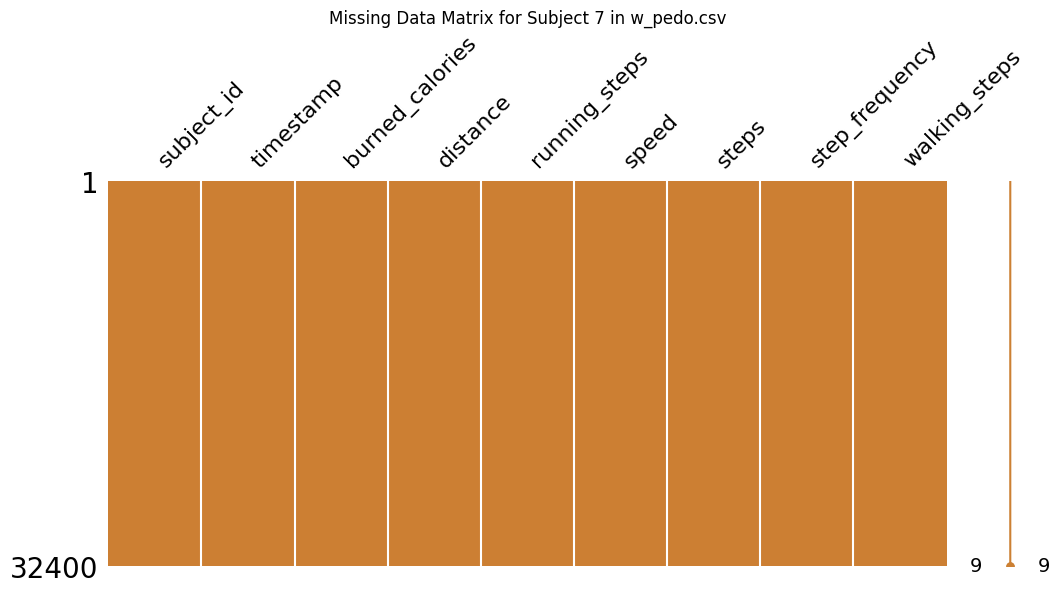

<Figure size 1200x500 with 0 Axes>

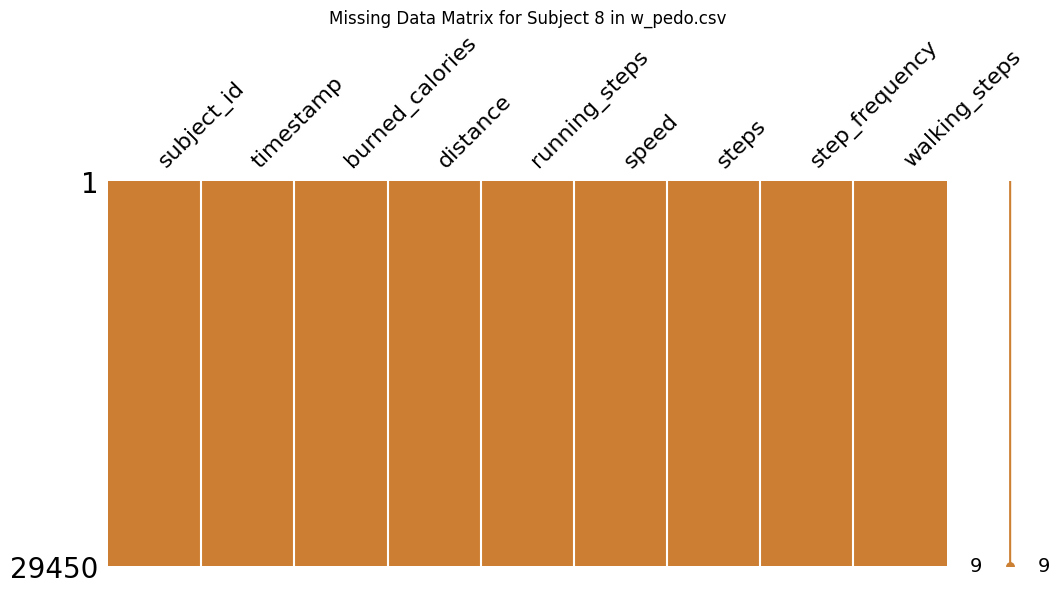

In [12]:
base_dir = "validation"
base_dir2 = "test"

file_paths = [
    "m_acc.csv",
    "m_activity.csv",
    "m_ambience.csv",
    "m_gps.csv",
    "m_light.csv",
    "m_usagestats.csv",
    "w_hr.csv",
    "w_light.csv",
    "w_pedo.csv"
]

# subject_id별로 결측치 시각화 함수
def visualize_missing_data(base_dir, file_paths):
    for file_path in file_paths:
        full_path = os.path.join(base_dir, file_path)
        if not os.path.exists(full_path):
            print(f"File {file_path} not found. Skipping...")
            continue
        
        df = pd.read_csv(full_path)
        
        if 'subject_id' in df.columns:
            subject_ids = df['subject_id'].unique()
            
            for subject_id in subject_ids:
                subject_df = df[df['subject_id'] == subject_id]
                plt.figure(figsize=(12, 5))
                msno.matrix(df=subject_df, figsize=(12, 5), color=(0.8, 0.5, 0.2))
                plt.title(f'Missing Data Matrix for Subject {subject_id} in {file_path}')
                plt.show()
        else:
            print(f"No subject_id column in {file_path}. Skipping...")

visualize_missing_data(base_dir, file_paths)
visualize_missing_data(base_dir2, file_paths)

In [13]:
def process_files_by_minute(base_dir, file_paths):
    for file_path in file_paths:
        full_path = os.path.join(base_dir, file_path)
        if not os.path.exists(full_path):
            print(f"File {file_path} not found. Skipping...")
            continue
        
        df = pd.read_csv(full_path)
        
        if 'timestamp' in df.columns and 'subject_id' in df.columns:
            df['datetime'] = pd.to_datetime(df['timestamp'], errors='coerce')
            if df['datetime'].isna().any():
                print(f"Error converting timestamps to datetime in {file_path}.")
                continue
            
            # 모든 subject_id에 대해 처리
            subject_ids = df['subject_id'].unique()
            for subject_id in subject_ids:
                subject_df = df[df['subject_id'] == subject_id].copy()
                
                # 중복된 datetime 인덱스 처리 (첫 번째 값 유지)
                subject_df = subject_df.drop_duplicates(subset='datetime', keep='first')
                
                subject_df.set_index('datetime', inplace=True)

                # Resampling and forward filling
                resampled_df = subject_df.resample('T').ffill()

                # 결과 저장
                output_dir = os.path.join(base_dir, f"processed_subject_{subject_id}")
                os.makedirs(output_dir, exist_ok=True)
                output_file = os.path.join(output_dir, f"minutely_{os.path.basename(file_path)}")
                resampled_df.to_csv(output_file)
                
                print(f"Processed file {output_file} created with {len(resampled_df)} records.")
        else:
            print(f"No 'timestamp' or 'subject_id' column in {file_path}. Skipping...")

process_files_by_minute(base_dir, file_paths)
process_files_by_minute(base_dir2, file_paths)

C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_1\minutely_m_acc.csv created with 59040 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_2\minutely_m_acc.csv created with 31680 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_3\minutely_m_acc.csv created with 40320 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_4\minutely_m_acc.csv created with 40318 records.
Processed file validation\processed_subject_1\minutely_m_activity.csv created with 59040 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_2\minutely_m_activity.csv created with 31680 records.
Processed file validation\processed_subject_3\minutely_m_activity.csv created with 40320 records.
Processed file validation\processed_subject_4\minutely_m_activity.csv created with 40320 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_1\minutely_m_ambience.csv created with 59039 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_2\minutely_m_ambience.csv created with 31679 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_3\minutely_m_ambience.csv created with 40319 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_4\minutely_m_ambience.csv created with 40319 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_1\minutely_m_gps.csv created with 58850 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_3\minutely_m_gps.csv created with 40320 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_2\minutely_m_gps.csv created with 30925 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_4\minutely_m_gps.csv created with 39496 records.
Processed file validation\processed_subject_1\minutely_m_light.csv created with 59029 records.
Processed file validation\processed_subject_2\minutely_m_light.csv created with 31665 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_3\minutely_m_light.csv created with 40546 records.
Processed file validation\processed_subject_4\minutely_m_light.csv created with 40312 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_1\minutely_m_usagestats.csv created with 59031 records.
Processed file validation\processed_subject_2\minutely_m_usagestats.csv created with 31671 records.
Processed file validation\processed_subject_3\minutely_m_usagestats.csv created with 40311 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_4\minutely_m_usagestats.csv created with 40311 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_1\minutely_w_hr.csv created with 59040 records.
Processed file validation\processed_subject_3\minutely_w_hr.csv created with 40294 records.
Processed file validation\processed_subject_2\minutely_w_hr.csv created with 30721 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_4\minutely_w_hr.csv created with 39489 records.
Processed file validation\processed_subject_1\minutely_w_light.csv created with 59030 records.
Processed file validation\processed_subject_2\minutely_w_light.csv created with 31676 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_3\minutely_w_light.csv created with 40304 records.
Processed file validation\processed_subject_4\minutely_w_light.csv created with 39491 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_1\minutely_w_pedo.csv created with 59040 records.
Processed file validation\processed_subject_2\minutely_w_pedo.csv created with 31665 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file validation\processed_subject_3\minutely_w_pedo.csv created with 40281 records.
Processed file validation\processed_subject_4\minutely_w_pedo.csv created with 39418 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_5\minutely_m_acc.csv created with 28800 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_6\minutely_m_acc.csv created with 47520 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_7\minutely_m_acc.csv created with 50390 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_8\minutely_m_acc.csv created with 47520 records.
Processed file test\processed_subject_5\minutely_m_activity.csv created with 28800 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_6\minutely_m_activity.csv created with 47520 records.
Processed file test\processed_subject_7\minutely_m_activity.csv created with 50400 records.
Processed file test\processed_subject_8\minutely_m_activity.csv created with 47520 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_5\minutely_m_ambience.csv created with 28799 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_6\minutely_m_ambience.csv created with 47519 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_7\minutely_m_ambience.csv created with 50399 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_8\minutely_m_ambience.csv created with 47519 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_6\minutely_m_gps.csv created with 38148 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_8\minutely_m_gps.csv created with 47494 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_7\minutely_m_gps.csv created with 49208 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_5\minutely_m_gps.csv created with 20158 records.
Processed file test\processed_subject_5\minutely_m_light.csv created with 28790 records.
Processed file test\processed_subject_6\minutely_m_light.csv created with 47520 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_7\minutely_m_light.csv created with 50392 records.
Processed file test\processed_subject_8\minutely_m_light.csv created with 47512 records.
Processed file test\processed_subject_5\minutely_m_usagestats.csv created with 28791 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_6\minutely_m_usagestats.csv created with 47511 records.
Processed file test\processed_subject_7\minutely_m_usagestats.csv created with 50391 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_8\minutely_m_usagestats.csv created with 47511 records.
Processed file test\processed_subject_6\minutely_w_hr.csv created with 46683 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_8\minutely_w_hr.csv created with 47520 records.
Processed file test\processed_subject_7\minutely_w_hr.csv created with 50102 records.
Processed file test\processed_subject_5\minutely_w_hr.csv created with 25955 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_5\minutely_w_light.csv created with 28788 records.
Processed file test\processed_subject_6\minutely_w_light.csv created with 47517 records.
Processed file test\processed_subject_7\minutely_w_light.csv created with 50389 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_8\minutely_w_light.csv created with 47518 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_5\minutely_w_pedo.csv created with 28800 records.
Processed file test\processed_subject_6\minutely_w_pedo.csv created with 47520 records.


C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()
C:\Users\lty\AppData\Local\Temp\ipykernel_23856\2455192007.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = subject_df.resample('T').ffill()


Processed file test\processed_subject_7\minutely_w_pedo.csv created with 50399 records.
Processed file test\processed_subject_8\minutely_w_pedo.csv created with 47520 records.


In [14]:
import os
import pandas as pd

# 기본 폴더 경로 설정
base_path = 'validation/processed_subject_'

# 각 주제(subject)별 파일 경로
file_paths = {
    'subject_1': [
        f'{base_path}1/minutely_m_acc.csv',
        f'{base_path}1/minutely_m_activity.csv',
        f'{base_path}1/minutely_m_ambience.csv',
        f'{base_path}1/minutely_m_gps.csv',
        f'{base_path}1/minutely_m_light.csv',
        f'{base_path}1/minutely_m_usagestats.csv',
        f'{base_path}1/minutely_w_hr.csv',
        f'{base_path}1/minutely_w_light.csv',
        f'{base_path}1/minutely_w_pedo.csv'
    ],
    'subject_2': [
        f'{base_path}2/minutely_m_acc.csv',
        f'{base_path}2/minutely_m_activity.csv',
        f'{base_path}2/minutely_m_ambience.csv',
        f'{base_path}2/minutely_m_gps.csv',
        f'{base_path}2/minutely_m_light.csv',
        f'{base_path}2/minutely_m_usagestats.csv',
        f'{base_path}2/minutely_w_hr.csv',
        f'{base_path}2/minutely_w_light.csv',
        f'{base_path}2/minutely_w_pedo.csv'
    ],
    'subject_3': [
        f'{base_path}3/minutely_m_acc.csv',
        f'{base_path}3/minutely_m_activity.csv',
        f'{base_path}3/minutely_m_ambience.csv',
        f'{base_path}3/minutely_m_gps.csv',
        f'{base_path}3/minutely_m_light.csv',
        f'{base_path}3/minutely_m_usagestats.csv',
        f'{base_path}3/minutely_w_hr.csv',
        f'{base_path}3/minutely_w_light.csv',
        f'{base_path}3/minutely_w_pedo.csv'
    ],
    'subject_4': [
        f'{base_path}4/minutely_m_acc.csv',
        f'{base_path}4/minutely_m_activity.csv',
        f'{base_path}4/minutely_m_ambience.csv',
        f'{base_path}4/minutely_m_gps.csv',
        f'{base_path}4/minutely_m_light.csv',
        f'{base_path}4/minutely_m_usagestats.csv',
        f'{base_path}4/minutely_w_hr.csv',
        f'{base_path}4/minutely_w_light.csv',
        f'{base_path}4/minutely_w_pedo.csv'
    ]
}

# 주제별 병합된 데이터를 수집할 리스트 초기화
all_merged_data = []

# 각 주제별 데이터 처리
for subject, paths in file_paths.items():
    subject_data = pd.DataFrame()
    for file_path in paths:
        if os.path.isfile(file_path):  # 파일 존재 여부 확인
            try:
                temp_data = pd.read_csv(file_path)
                if 'datetime' in temp_data.columns:
                    temp_data['datetime'] = pd.to_datetime(temp_data['datetime'])
                    if subject_data.empty:
                        subject_data = temp_data
                    else:
                        subject_data = pd.merge(subject_data, temp_data, on='datetime', how='outer', suffixes=('', '_dup'))
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # 주제별 병합된 데이터 리스트에 추가
    all_merged_data.append(subject_data)

# 모든 주제별 데이터를 수직으로 연결
final_merged_data = pd.concat(all_merged_data, ignore_index=True)

# 결과 출력
print(final_merged_data.head())


             datetime            timestamp  subject_id    x_last    x_mean  \
0 2023-08-20 00:00:00  2023-08-20 00:00:00         1.0  0.928415  0.944470   
1 2023-08-20 00:01:00  2023-08-20 00:01:00         1.0  0.937986  0.945673   
2 2023-08-20 00:02:00  2023-08-20 00:02:00         1.0  0.952343  0.945925   
3 2023-08-20 00:03:00  2023-08-20 00:03:00         1.0  0.952343  0.946545   
4 2023-08-20 00:04:00  2023-08-20 00:04:00         1.0  0.937986  0.945065   

      x_max     x_min  x_median    y_last    y_mean  ...  w_light  \
0  0.985843  0.894916  0.942772 -3.507878 -3.505201  ...      NaN   
1  0.990629  0.899701  0.947558 -3.507878 -3.506035  ...      NaN   
2  1.000200  0.904487  0.947558 -3.507878 -3.505814  ...    224.0   
3  0.985843  0.899701  0.947558 -3.503092 -3.506461  ...    224.0   
4  0.990629  0.899701  0.942772 -3.493521 -3.505354  ...    224.0   

   subject_id_dup        timestamp_dup  burned_calories  distance  \
0             1.0  2023-08-20 00:00:00         

In [15]:
import os
import pandas as pd

# 기본 폴더 경로 설정
base_path = 'test/processed_subject_'

# 각 주제(subject)별 파일 경로
file_paths = {
    'subject_5': [
        f'{base_path}5/minutely_m_acc.csv',
        f'{base_path}5/minutely_m_activity.csv',
        f'{base_path}5/minutely_m_ambience.csv',
        f'{base_path}5/minutely_m_gps.csv',
        f'{base_path}5/minutely_m_light.csv',
        f'{base_path}5/minutely_m_usagestats.csv',
        f'{base_path}5/minutely_w_hr.csv',
        f'{base_path}5/minutely_w_light.csv',
        f'{base_path}5/minutely_w_pedo.csv'
    ],
    'subject_6': [
        f'{base_path}6/minutely_m_acc.csv',
        f'{base_path}6/minutely_m_activity.csv',
        f'{base_path}6/minutely_m_ambience.csv',
        f'{base_path}6/minutely_m_gps.csv',
        f'{base_path}6/minutely_m_light.csv',
        f'{base_path}6/minutely_m_usagestats.csv',
        f'{base_path}6/minutely_w_hr.csv',
        f'{base_path}6/minutely_w_light.csv',
        f'{base_path}6/minutely_w_pedo.csv'
    ],
    'subject_7': [
        f'{base_path}7/minutely_m_acc.csv',
        f'{base_path}7/minutely_m_activity.csv',
        f'{base_path}7/minutely_m_ambience.csv',
        f'{base_path}7/minutely_m_gps.csv',
        f'{base_path}7/minutely_m_light.csv',
        f'{base_path}7/minutely_m_usagestats.csv',
        f'{base_path}7/minutely_w_hr.csv',
        f'{base_path}7/minutely_w_light.csv',
        f'{base_path}7/minutely_w_pedo.csv'
    ],
    'subject_8': [
        f'{base_path}8/minutely_m_acc.csv',
        f'{base_path}8/minutely_m_activity.csv',
        f'{base_path}8/minutely_m_ambience.csv',
        f'{base_path}8/minutely_m_gps.csv',
        f'{base_path}8/minutely_m_light.csv',
        f'{base_path}8/minutely_m_usagestats.csv',
        f'{base_path}8/minutely_w_hr.csv',
        f'{base_path}8/minutely_w_light.csv',
        f'{base_path}8/minutely_w_pedo.csv'
    ]
}

# 주제별 병합된 데이터를 수집할 리스트 초기화
all_merged_data = []

# 각 주제별 데이터 처리
for subject, paths in file_paths.items():
    subject_data = pd.DataFrame()
    for file_path in paths:
        if os.path.isfile(file_path):  # 파일 존재 여부 확인
            try:
                temp_data = pd.read_csv(file_path)
                if 'datetime' in temp_data.columns:
                    temp_data['datetime'] = pd.to_datetime(temp_data['datetime'])
                    if subject_data.empty:
                        subject_data = temp_data
                    else:
                        subject_data = pd.merge(subject_data, temp_data, on='datetime', how='outer', suffixes=('', '_dup'))
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # 주제별 병합된 데이터 리스트에 추가
    all_merged_data.append(subject_data)

# 모든 주제별 데이터를 수직으로 연결
final_merged_data2 = pd.concat(all_merged_data, ignore_index=True)

# 결과 출력
print(final_merged_data2.head())

             datetime            timestamp  subject_id    x_last    x_mean  \
0 2023-11-05 00:00:00  2023-11-05 00:00:00         5.0 -0.074220 -0.079756   
1 2023-11-05 00:01:00  2023-11-05 00:01:00         5.0 -0.071826 -0.078615   
2 2023-11-05 00:02:00  2023-11-05 00:02:00         5.0 -0.079009 -0.078439   
3 2023-11-05 00:03:00  2023-11-05 00:03:00         5.0 -0.071826 -0.068377   
4 2023-11-05 00:04:00  2023-11-05 00:04:00         5.0 -0.040701 -0.070256   

      x_max     x_min  x_median    y_last    y_mean  ...  w_light  \
0  0.088585 -0.462081 -0.079009  0.136469  0.108708  ...      NaN   
1  0.177171 -0.356736 -0.079009  0.105345  0.107999  ...      NaN   
2  3.536236 -3.888184 -0.079009  0.114922  0.111475  ...      NaN   
3  0.280122 -0.316035 -0.069432  0.095768  0.113084  ...      NaN   
4  0.280122 -0.720655 -0.071826  0.112527  0.113228  ...      NaN   

   subject_id_dup        timestamp_dup  burned_calories  distance  \
0             5.0  2023-11-05 00:00:00         

In [16]:
final_merged_data = final_merged_data.loc[:, ~final_merged_data.columns.str.endswith('_dup')]
final_merged_data2 = final_merged_data2.loc[:, ~final_merged_data2.columns.str.endswith('_dup')]

In [17]:
final_merged_data.dropna(subset=['timestamp'], inplace=True)
final_merged_data2.dropna(subset=['timestamp'], inplace=True)

In [18]:
combined_output_file = 'validation/val_combine.csv'
final_merged_data.to_csv(combined_output_file, index=False)
combined_output_file = 'test/test_combine.csv'
final_merged_data2.to_csv(combined_output_file, index=False)
final_merged_data


,datetime,timestamp,subject_id,x_last,x_mean,x_max,x_min,x_median,y_last,y_mean,...,heart_rate_min,heart_rate_median,w_light,burned_calories,distance,running_steps,speed,steps,step_frequency,walking_steps
0,2023-08-20 00:00:00,2023-08-20 00:00:00,1.0,0.928415,0.944470,0.985843,0.894916,0.942772,-3.507878,-3.505201,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-08-20 00:01:00,2023-08-20 00:01:00,1.0,0.937986,0.945673,0.990629,0.899701,0.947558,-3.507878,-3.506035,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-08-20 00:02:00,2023-08-20 00:02:00,1.0,0.952343,0.945925,1.000200,0.904487,0.947558,-3.507878,-3.505814,...,0.0,0.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-08-20 00:03:00,2023-08-20 00:03:00,1.0,0.952343,0.946545,0.985843,0.899701,0.947558,-3.503092,-3.506461,...,0.0,0.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-08-20 00:04:00,2023-08-20 00:04:00,1.0,0.937986,0.945065,0.990629,0.899701,0.942772,-3.493521,-3.505354,...,0.0,0.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171586,2023-11-01 23:53:00,2023-11-01 23:53:00,4.0,9.267701,9.261243,9.579965,9.089137,9.260523,0.256032,0.252720,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171587,2023-11-01 23:54:00,2023-11-01 23:54:00,4.0,9.260523,9.260952,9.319147,9.206385,9.261719,0.254836,0.250555,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171588,2023-11-01 23:55:00,2023-11-01 23:55:00,4.0,9.255438,9.262060,9.322736,9.212367,9.261719,0.256032,0.249427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171589,2023-11-01 23:56:00,2023-11-01 23:56:00,4.0,9.237492,9.262317,9.317950,9.201599,9.261719,0.257228,0.248694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

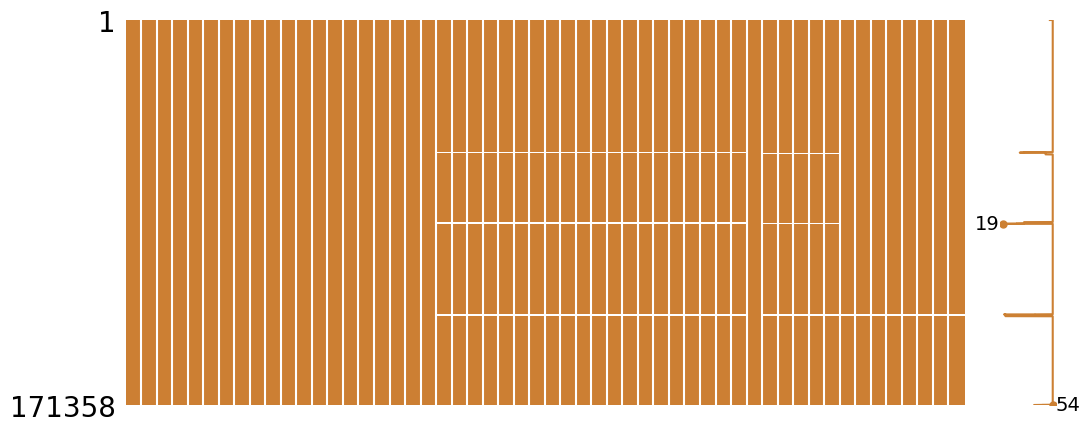

In [9]:
# 결측치 확인
import missingno as msno

msno.matrix(df=final_merged_data, figsize=(12,5), color = (0.8, 0.5, 0.2))

<Figure size 1200x500 with 0 Axes>

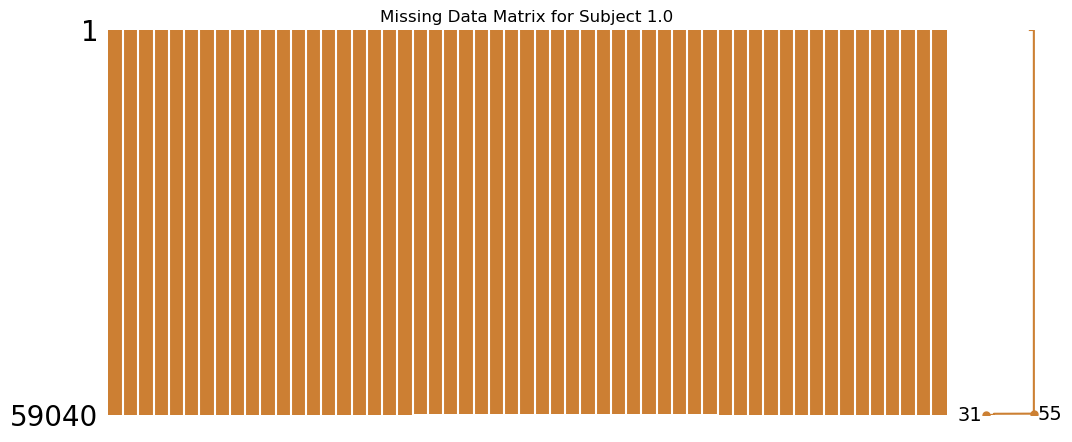

<Figure size 1200x500 with 0 Axes>

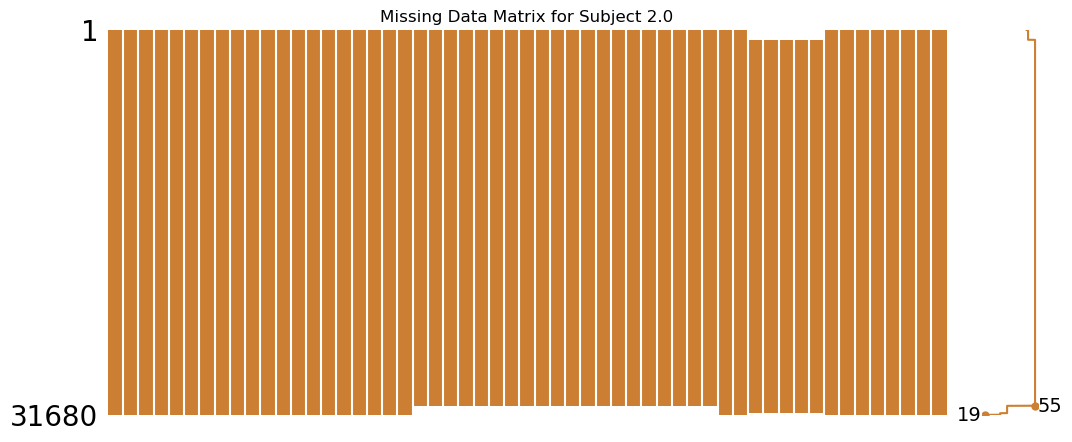

<Figure size 1200x500 with 0 Axes>

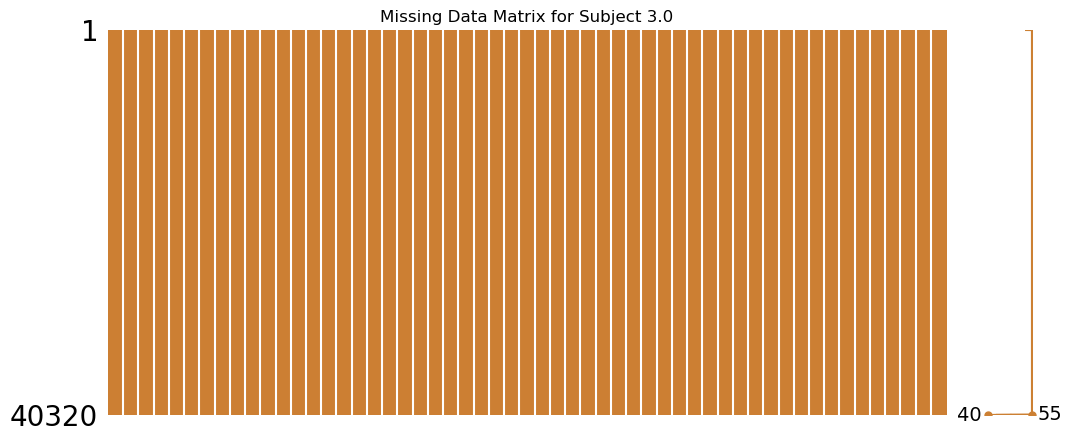

<Figure size 1200x500 with 0 Axes>

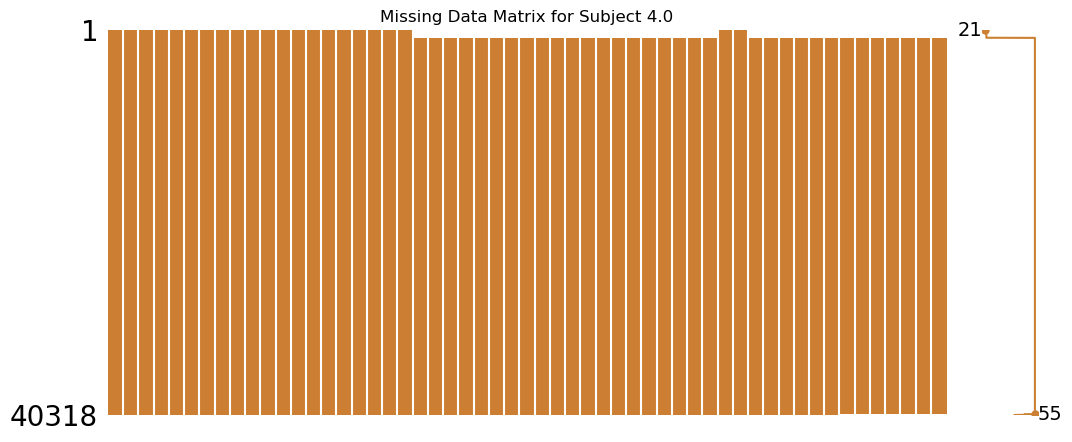

In [36]:
import matplotlib.pyplot as plt

# subject_id별로 결측치 시각화
subject_ids = final_merged_data['subject_id'].unique()

for subject_id in subject_ids:
    subject_df = final_merged_data[final_merged_data['subject_id'] == subject_id]
    plt.figure(figsize=(12, 5))
    msno.matrix(df=subject_df, figsize=(12, 5), color=(0.8, 0.5, 0.2))
    plt.title(f'Missing Data Matrix for Subject {subject_id}')
    plt.show()

In [10]:
# subject_id별로 결측치 비율 시각화
subject_ids = final_merged_data['subject_id'].unique()

for subject_id in subject_ids:
    subject_df = final_merged_data[final_merged_data['subject_id'] == subject_id]
    
    # 결측치 비율 계산
    missing_ratio = subject_df.isnull().mean() * 100
    
    # 결측치 비율 출력
    print(f'Missing Data Ratio for Subject {subject_id}:\n{missing_ratio}\n')
    


Missing Data Ratio for Subject 1.0:
datetime             0.000000
timestamp            0.000000
subject_id           0.000000
x_last               0.000000
x_mean               0.000000
x_max                0.000000
x_min                0.000000
x_median             0.000000
y_last               0.000000
y_mean               0.000000
y_max                0.000000
y_min                0.000000
y_median             0.000000
z_last               0.000000
z_mean               0.000000
z_max                0.000000
z_min                0.000000
z_median             0.000000
m_activity           0.000000
ambience_labels      0.001694
altitude_last        0.321816
altitude_mean        0.321816
altitude_max         0.321816
altitude_min         0.321816
altitude_median      0.321816
latitude_last        0.321816
latitude_mean        0.321816
latitude_max         0.321816
latitude_min         0.321816
latitude_median      0.321816
longitude_last       0.321816
longitude_mean       0.321816
long